# Project and its purpose

The main purposes of our third project are to get familiar with Machine Learning algorithms. By using these algorithms, we are able to forecast and estimate the number of customer's purchased products for a shop.


# Define the project

In this project, we will use different types of Machine Learning algorithms for estimating the number of customer's purchased products. This project can be divided in main three sections. In the first section, we will train a Linear Regression model from scratch. In the next section, we will implement a Multiple Regression model for our problem by using gradient descent algorithm. In the last section we use different types of classification algorithms including Decision Trees, K-Nearest-Neighbors, Logistic Regression, Random Forest for our purpose.


# Import, Mount and Read Data

Imported libraries are in the cell below, and we will use them in different sections of this project.

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_tree
from scipy.stats.mstats import winsorize
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Mounting excel data file from Google Drive.

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read data using pandas method called read_csv().

In [107]:
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv')

# Exploratory Data Analysis

For having some intuition about dataset, we can see first five observations of the dataset using head() method.



In [108]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,88,546,172,88,88.0,NaN,0,25,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,NaN,1,6,2,1,6.0,5.0,0,6,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,NaN,49,127,111,21,42.0,NaN,0,21,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,4,20,10,3,5.0,6.0,0,8,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,43,118,46,27,15.0,5.0,0,19,0


For having some intuition about dataset, we can see last five observations of the dataset using tail() method.

In [109]:
df.tail()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,43,182,42,118,247.0,5.0,0,18,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,0,30,0,0,8.0,7.0,0,22,1
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,48,217,32,12,24.0,6.0,0,19,1
2238,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,30,214,80,30,61.0,NaN,0,23,0
2239,2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84.0,3,61,2,1,21.0,7.0,0,11,1


In our dataset, the column "Unnamed: 0" contain index values which do not have any predictive power to predict our dependent variable. By using drop() method, we removed this column.

In [110]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

**1**. info() helps us to understand the data type and have some information about the data, including the number of records in each column, null or not null, Data type and the memory usage of the dataset.


*   By using this analysis we are able to acknowledge that Income, MntCoffe, MntGoldProds and NumWebVisitsMonth have null or missing values because their Non-Null Count is less than RangeIndex with 2240 entries.



In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2017 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2035 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2227 non-null   float64
 15  NumWebVisitsMonth  2040 non-null   float64
 16  Complain           2240 

**1**. describe() method gives a quick and simple description of the data's statistics. It can include Count, Mean, Standard Deviation, median, minimum value, maximum value etc. By using this method, we can identify whether the data has any outliers and have some intuition about the way that our data distributed.


*   The minimum number of children in customer's household is a negative number which is clearly an inaccurate data, and it seems like there was a data entry issue for this case.
*   The maximum number for customer's yearly household income is 666k, which is quite high compared to the upper 75 percentiles. There may be outlier data in Income column.





In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2017.0,52297.080317,25543.108215,2447.0,35340.00,51369.0,68316.00,666666.0
Kidhome,2240.0,0.437946,0.563666,-5.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntCoffee,2035.0,304.239312,337.515534,0.0,23.00,177.0,505.00,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**2**. The number of missing data for each feature is driven with isnull().sum()

In [113]:
null_num = df.isnull().sum();
print(null_num)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income               223
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoffee            205
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds          13
NumWebVisitsMonth    200
Complain               0
NumPurchases           0
UsedCampaignOffer      0
dtype: int64


**2**. The ratio for number of null data over all the data for each feature is driven using the cell below. From this ratio, we can see that:


*   Income, MntCoffee and NumWebVisitsMonth have considerable amount of missing data
*   MntGoldProds have much less missing data compared to other ones
*   Other columns do not have any missing data



In [114]:
not_null_num = df.notnull().sum();
ratio = null_num/(not_null_num+null_num)
print(ratio)

ID                   0.000000
Year_Birth           0.000000
Education            0.000000
Marital_Status       0.000000
Income               0.099554
Kidhome              0.000000
Teenhome             0.000000
Dt_Customer          0.000000
Recency              0.000000
MntCoffee            0.091518
MntFruits            0.000000
MntMeatProducts      0.000000
MntFishProducts      0.000000
MntSweetProducts     0.000000
MntGoldProds         0.005804
NumWebVisitsMonth    0.089286
Complain             0.000000
NumPurchases         0.000000
UsedCampaignOffer    0.000000
dtype: float64


**3**. In statistics, correlation is usually defined by the Pearson correlation and its formula: [1]
$$
r = \frac{\sum(x_i-\widehat{x})(y_i-\widehat{y})}{\sqrt{\sum(x_i-\widehat{x})^2\sum(y_i-\widehat{y})^2}}
$$
The below code cell results in the heatmap plot of the correlations between each column of the data frame. The correlation between the self is one, the negative correlation means by increasing one column the value of the second one will decrease, and positive correlations define a positive relationship which means by increasing one column the value of the second one will also increase. We found this parameter by using corr() method.

The first five features which have high correlations with NumPurchases are:


1.   MntCoffee
2.   Income
3.   MntMeatProducts
4.   MntGoldProds
5.   MntSweetProducts



<ipython-input-115-3df5625f523c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


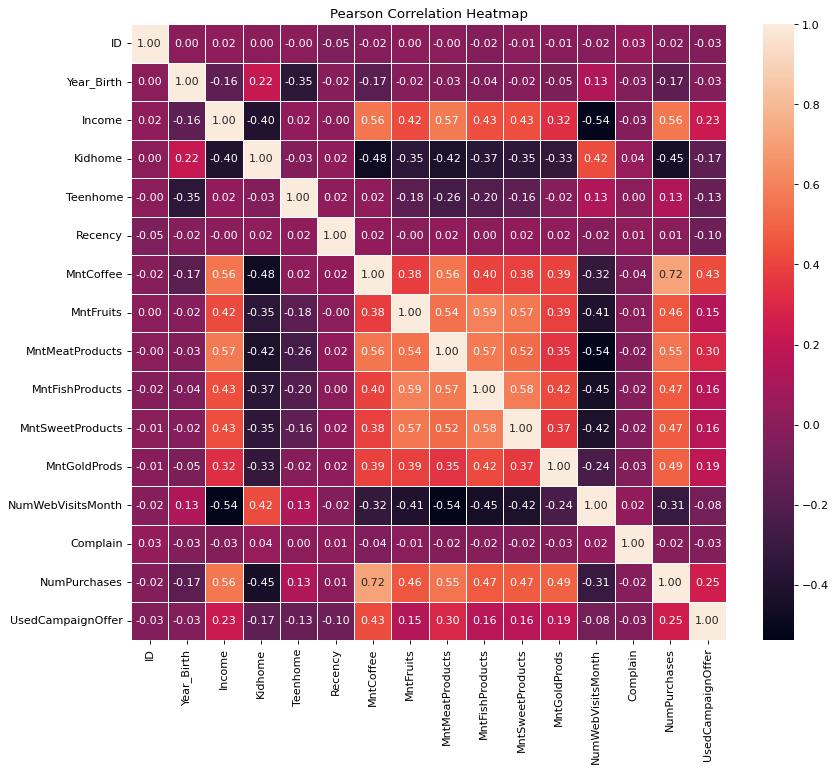

In [115]:
corr = df.corr(method = 'pearson')
plt.figure(figsize=(12,10), dpi =80)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

**4**. A histogram can show the pattern of the variables, as some variables have skewness and outliers. These histograms are derived using hist() method.


*   ID and Recency have nearly a uniform distribution
*   Besides their outliers, we can say that the Year Birth and Income have a symmetric distribution

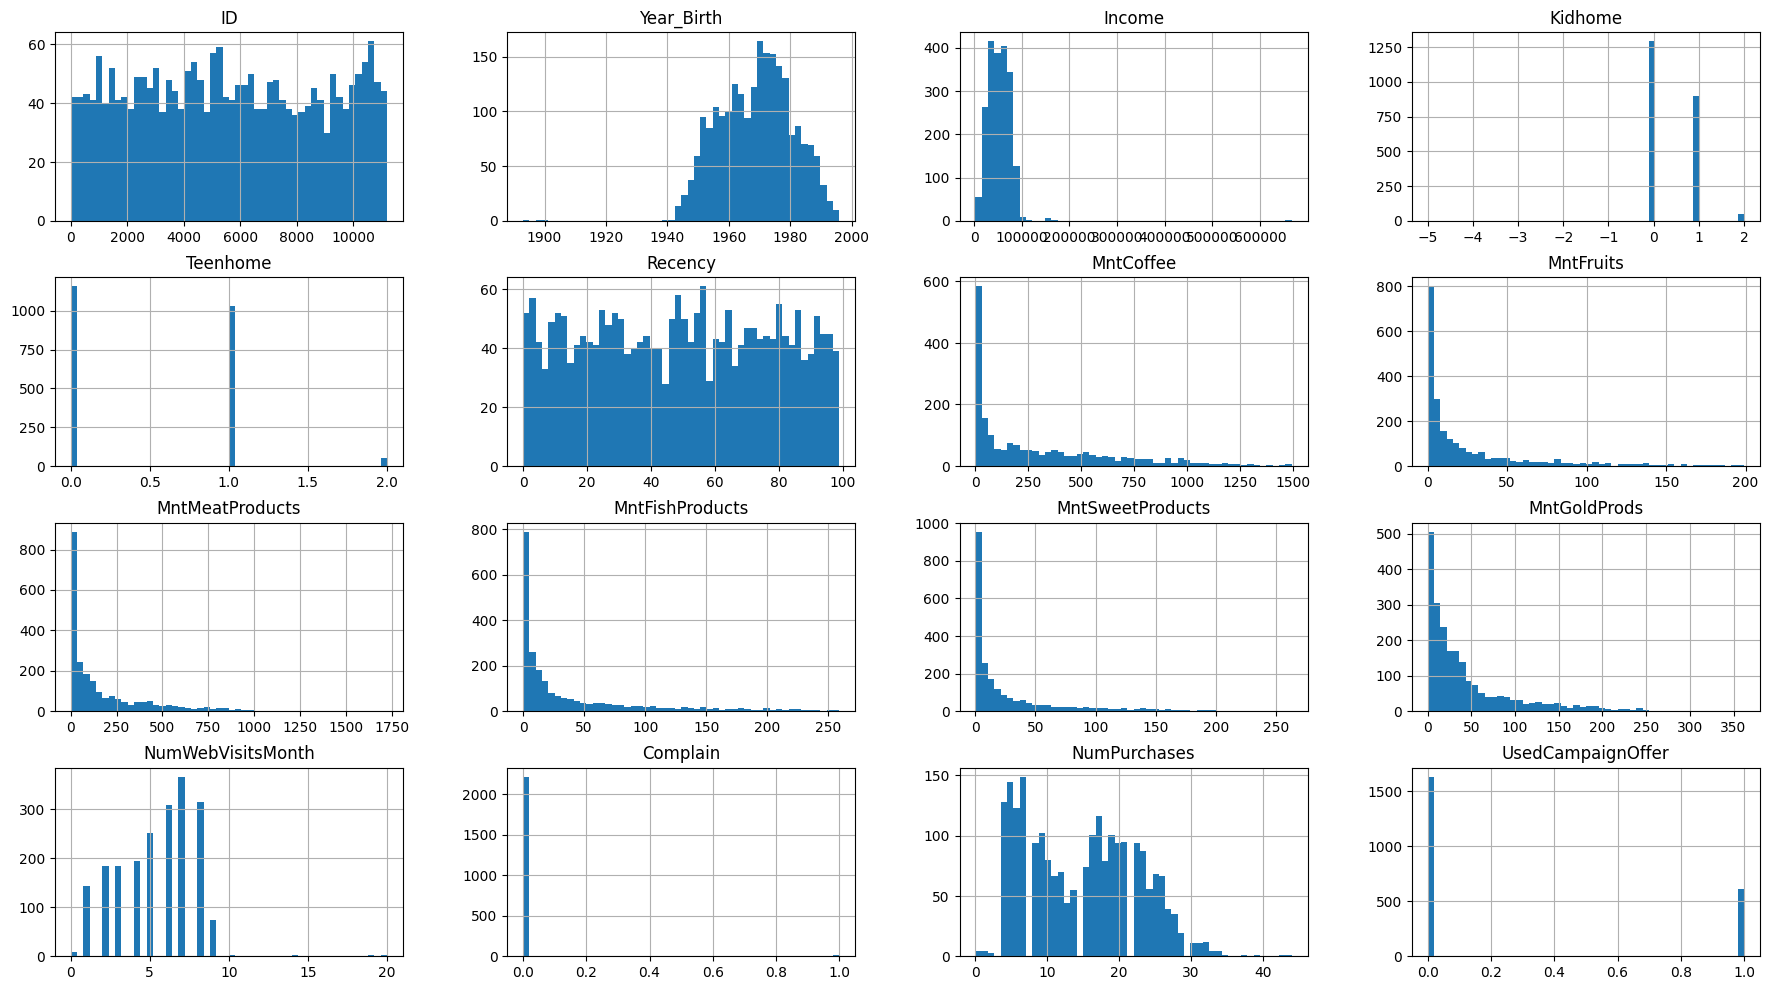

In [116]:
hist = df.hist(bins=50, figsize=(22, 12))

**5**. For Numerical variables, hexbin and Scatter plots are widely been used for Bivariate Analysis. These plots are plotted using scatter() and hexbin() and they provide us below insights:


*   The variable for customer's yearly household income has a positive correlation with our target feature.
*   There is a data point for customer's yearly household income with the number of 666k, which is probably an outlier data.
*   The variable for number of children in customer's household has a negative correlation with our target feature.
*   The variable for amount spent on all types of the products in last two years show a positive correlation with our target feature.





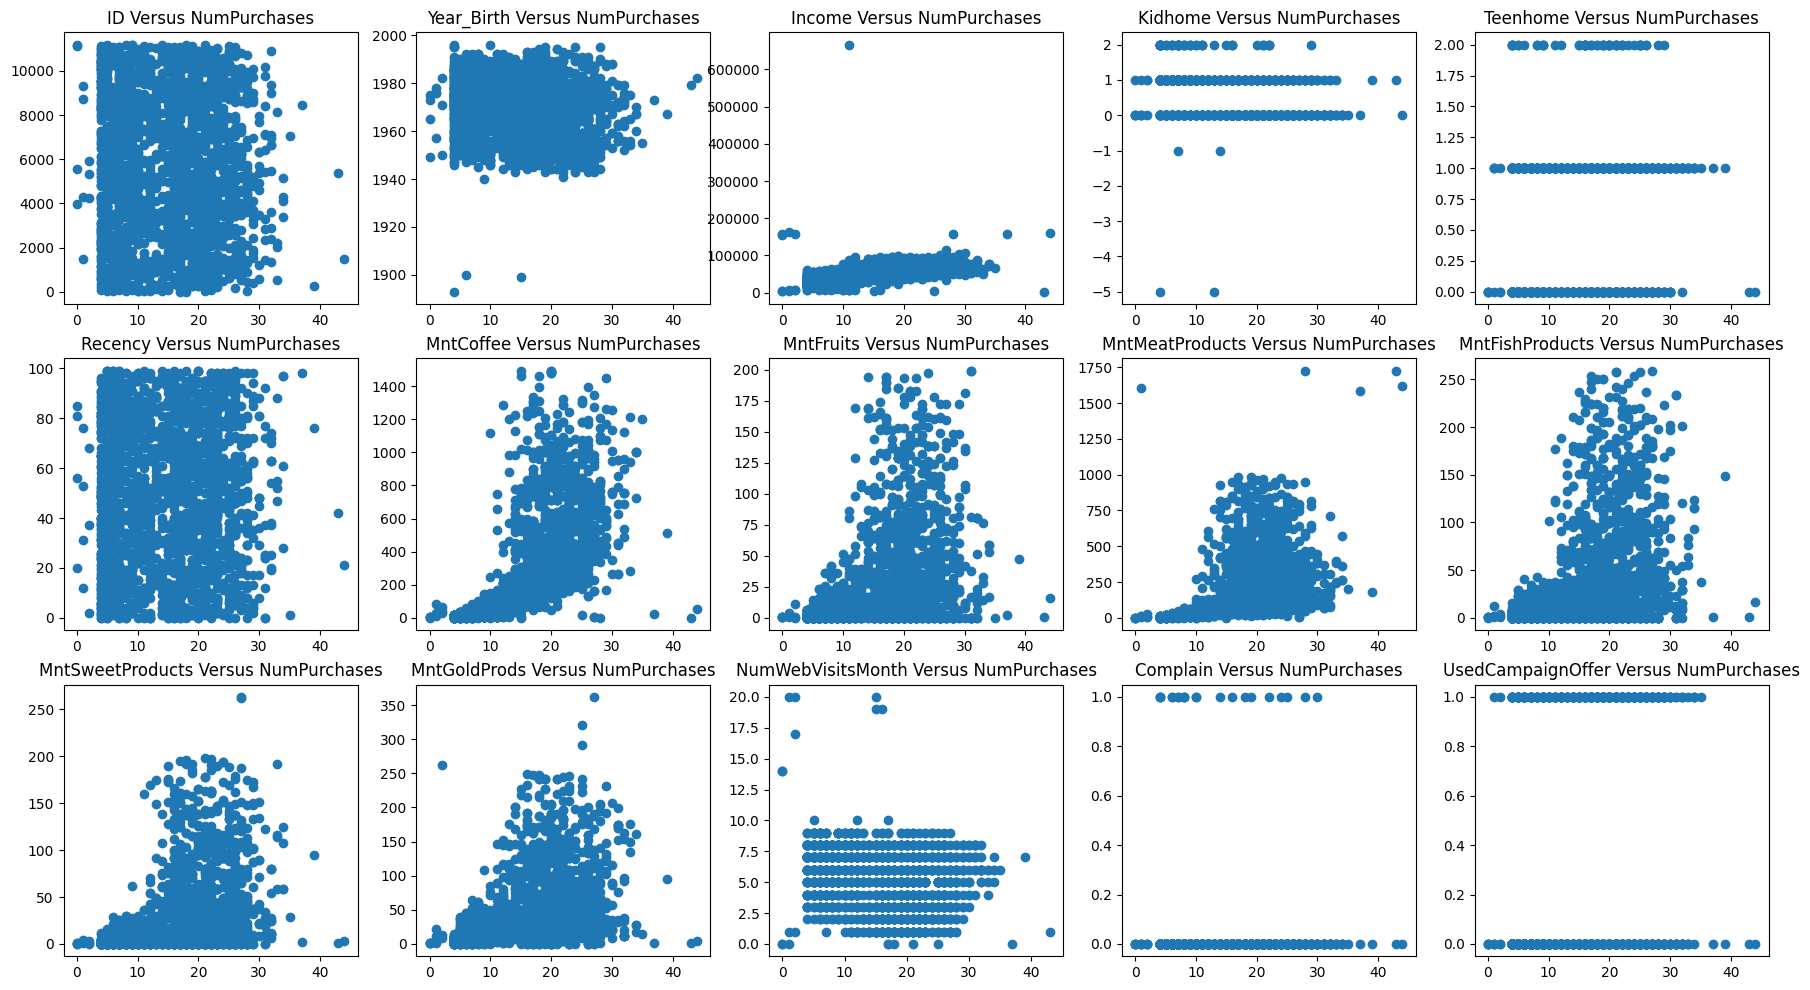

In [117]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(22, 12))
ax[0,0].scatter(df.loc[:,"NumPurchases"], df.loc[:,"ID"])
ax[0,0].title.set_text('ID Versus NumPurchases')
ax[0,1].scatter(df.loc[:,"NumPurchases"], df.loc[:,"Year_Birth"])
ax[0,1].title.set_text('Year_Birth Versus NumPurchases')
ax[0,2].scatter(df.loc[:,"NumPurchases"], df.loc[:,"Income"])
ax[0,2].title.set_text('Income Versus NumPurchases')
ax[0,3].scatter(df.loc[:,"NumPurchases"], df.loc[:,"Kidhome"])
ax[0,3].title.set_text('Kidhome Versus NumPurchases')
ax[0,4].scatter(df.loc[:,"NumPurchases"], df.loc[:,"Teenhome"])
ax[0,4].title.set_text('Teenhome Versus NumPurchases')
ax[1,0].scatter(df.loc[:,"NumPurchases"], df.loc[:,"Recency"])
ax[1,0].title.set_text('Recency Versus NumPurchases')
ax[1,1].scatter(df.loc[:,"NumPurchases"], df.loc[:,"MntCoffee"])
ax[1,1].title.set_text('MntCoffee Versus NumPurchases')
ax[1,2].scatter(df.loc[:,"NumPurchases"], df.loc[:,"MntFruits"])
ax[1,2].title.set_text('MntFruits Versus NumPurchases')
ax[1,3].scatter(df.loc[:,"NumPurchases"], df.loc[:,"MntMeatProducts"])
ax[1,3].title.set_text('MntMeatProducts Versus NumPurchases')
ax[1,4].scatter(df.loc[:,"NumPurchases"], df.loc[:,"MntFishProducts"])
ax[1,4].title.set_text('MntFishProducts Versus NumPurchases')
ax[2,0].scatter(df.loc[:,"NumPurchases"], df.loc[:,"MntSweetProducts"])
ax[2,0].title.set_text('MntSweetProducts Versus NumPurchases')
ax[2,1].scatter(df.loc[:,"NumPurchases"], df.loc[:,"MntGoldProds"])
ax[2,1].title.set_text('MntGoldProds Versus NumPurchases')
ax[2,2].scatter(df.loc[:,"NumPurchases"], df.loc[:,"NumWebVisitsMonth"])
ax[2,2].title.set_text('NumWebVisitsMonth Versus NumPurchases')
ax[2,3].scatter(df.loc[:,"NumPurchases"], df.loc[:,"Complain"])
ax[2,3].title.set_text('Complain Versus NumPurchases')
ax[2,4].scatter(df.loc[:,"NumPurchases"], df.loc[:,"UsedCampaignOffer"])
ax[2,4].title.set_text('UsedCampaignOffer Versus NumPurchases')
plt.show()

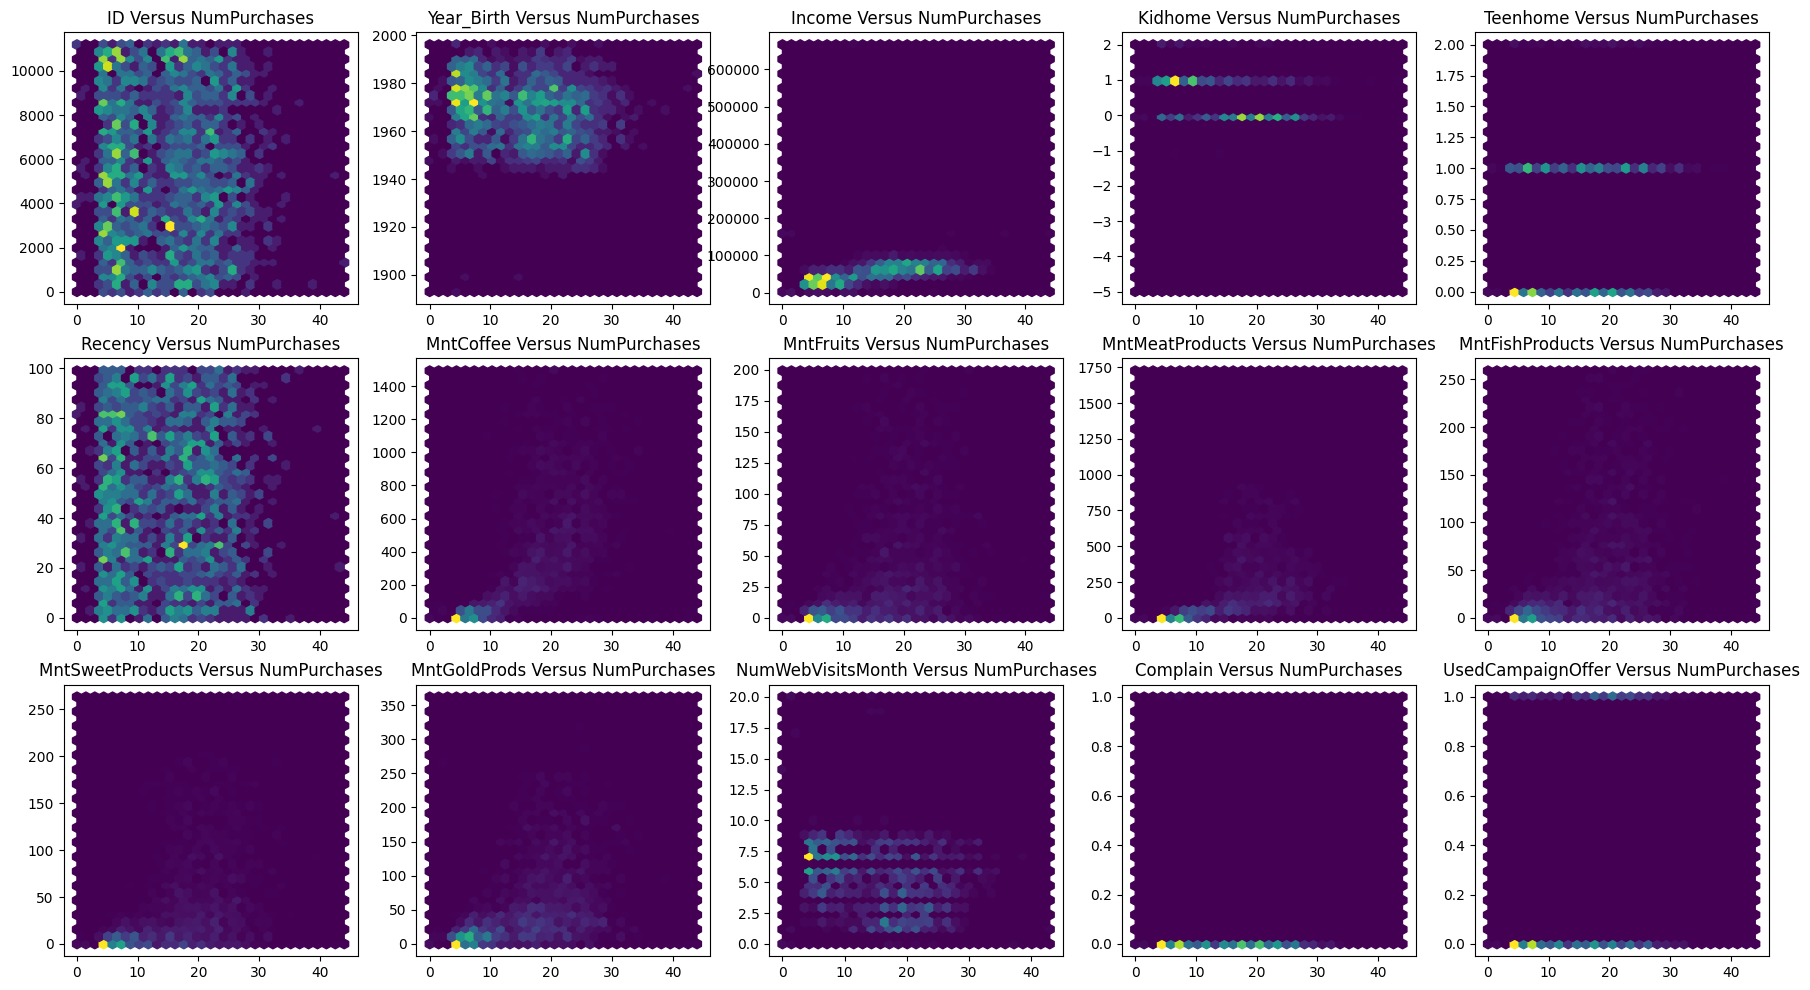

In [118]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(22, 12))
ax[0,0].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"ID"], gridsize = 30)
ax[0,0].title.set_text('ID Versus NumPurchases')
ax[0,1].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"Year_Birth"], gridsize = 30)
ax[0,1].title.set_text('Year_Birth Versus NumPurchases')
ax[0,2].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"Income"], gridsize = 30)
ax[0,2].title.set_text('Income Versus NumPurchases')
ax[0,3].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"Kidhome"], gridsize = 30)
ax[0,3].title.set_text('Kidhome Versus NumPurchases')
ax[0,4].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"Teenhome"], gridsize = 30)
ax[0,4].title.set_text('Teenhome Versus NumPurchases')
ax[1,0].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"Recency"], gridsize = 30)
ax[1,0].title.set_text('Recency Versus NumPurchases')
ax[1,1].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"MntCoffee"], gridsize = 30)
ax[1,1].title.set_text('MntCoffee Versus NumPurchases')
ax[1,2].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"MntFruits"], gridsize = 30)
ax[1,2].title.set_text('MntFruits Versus NumPurchases')
ax[1,3].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"MntMeatProducts"], gridsize = 30)
ax[1,3].title.set_text('MntMeatProducts Versus NumPurchases')
ax[1,4].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"MntFishProducts"], gridsize = 30)
ax[1,4].title.set_text('MntFishProducts Versus NumPurchases')
ax[2,0].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"MntSweetProducts"], gridsize = 30)
ax[2,0].title.set_text('MntSweetProducts Versus NumPurchases')
ax[2,1].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"MntGoldProds"], gridsize = 30)
ax[2,1].title.set_text('MntGoldProds Versus NumPurchases')
ax[2,2].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"NumWebVisitsMonth"], gridsize = 30)
ax[2,2].title.set_text('NumWebVisitsMonth Versus NumPurchases')
ax[2,3].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"Complain"], gridsize = 30)
ax[2,3].title.set_text('Complain Versus NumPurchases')
ax[2,4].hexbin(df.loc[:,"NumPurchases"], df.loc[:,"UsedCampaignOffer"], gridsize = 30)
ax[2,4].title.set_text('UsedCampaignOffer Versus NumPurchases')
plt.show()

# Data Preprocessing

As mentioned before, there are several impossible values in the number of children in a customer's household, and we need to replace these impossible values with the column's median. The reason behind choosing the median over other methods is explained in the next text cell.



In [119]:
im_val = df['Kidhome'] < 0
for i in range(np.shape(df['Kidhome'])[0]):
  if im_val[i] == True:
      df['Kidhome'][i] = df['Kidhome'].median()
  else:
      pass

<ipython-input-119-ef1339625a57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kidhome'][i] = df['Kidhome'].median()
<ipython-input-119-ef1339625a57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kidhome'][i] = df['Kidhome'].median()
<ipython-input-119-ef1339625a57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kidhome'][i] = df['Kidhome'].median()
<ipython-input-119-ef1339625a57>:4: SettingWithCopyWarning: 
A valu

**7**. In data analysis, there are several strategies we can consider dealing with missing data. Some of the most popular ones are explained here: [2]

**Removing The Missing Data:** If the count of missing data is small, and they are randomly distributed, we can remove the rows or columns containing those missing values.

**Imputation:** In imputation method, we fill in missing values with estimated or calculated values. Common imputation methods include:
* Filling the missing values with mean, median or mode of the observed data.
* Use the value before or after the missing value to fill it. This method is called Forward or Backward filling.
* Another method is to interpolate the missing values by using the values of neighboring data points.
* In multiple imputation, we fill the missing data by taking into account the information from the other columns.

**Machine Learning Models:** We can train a machine learning model to predict missing values based on other features in the dataset.

**Domain-specific imputation:** This method involves using domain-specific knowledge or using the expert judgment about the missing values.

Each of the methods has its own advantages and disadvantages, including:

**Removing Missing Data:**

Pros:
* It is simple and straightforward
* There is no need for any imputation, assumption or calculation

Cons:
* Removing data can cause significant loss of data
* We can lose lots of valuable information

**Imputation by using Mean, Median or Mode:**

Pros:
* It is relatively simple.
* In most cases it preserves the overall structure of the data

Cons:
* This method can distort the original distribution
* It does not include any relationship between variables

**Forward or Backward Fill:**

Pros:
* It is suitable for time-series datasets

Cons:
* This method includes some degree of continuity between observations, and this may not be suitable for all types of datasets

**Interpolation:**

Pros:
* It includes the trend of the dataset

Cons:
* In this method, a continuous relationship between variables is needed

**Machine Learning Models:**

Pros:
* This method includes complex relationships in the dataset

Cons:
* This method is more complex in computational matters

**Domain-Specific Imputation:**

Pros:
* This method can provide more meaningful imputations

Cons:
* it depends on the availability and accuracy of domain knowledge

**8**. By using above understandings about the methods, we do not use Domain-Specific Imputation, Forward or Backward Fill or Interpolation and Machine Learning Models because of their lack of availability, absence of continuity in our dataset and computational complexity, respectively. Imputation by using Mean, Median or Mode is our choice over Removing Missing Data because it does not lose any valuable information.

Between Mean, Median or Mode for imputation, we chose Median because our dataset for missing data is skewed according to histogram plots, our missing data is numeric, and we want less influence by outliers.

From previous section we know that Income, MntCoffee and NumWebVisitsMonth have considerable amount of missing data and MntGoldProds have much less missing data compared to other ones. Other columns do not hold any missing data.

There are some negative numbers for number of children in customer's household which are impossible, and we replaced these impossible values with the median of this column.

Hence, by using fillna() method, the missing data in each column is replaced by the column's Median.



In [120]:
columns = ['Income', 'MntCoffee', 'NumWebVisitsMonth', 'MntGoldProds']
for column in columns:
  df[column].fillna(df[column].median(), inplace=True)

In the previous section, we saw that there are some outliers in our data. Winsorization is the process of replacing the extreme values of statistical data. This process helps us to limit the effect of the outliers on the model. Below code cell show how we replaced the top 5% and bottom 5% of the data using winsorize() method. We just did Winsorization for columns, that their correlation improved after doing this process. [3]


In [121]:
all_columns = ['ID','Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoffee', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for column in all_columns:
  WinsorizedArray = winsorize(df[column], limits=[0.05, 0.05])
  for i in range(np.shape(df[column])[0]):
    df[column][i] = WinsorizedArray[i]

<ipython-input-121-5d4046d9742a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = WinsorizedArray[i]


**9**. Normalization is used to adjust the values of features in a dataset to a new scale. Normalization is a scaling method in which values are shifted in a way that they end up ranging between 0 and 1. Normalization maintain the relationship between the minimum and maximum values of each feature, and it is important for our algorithms. Normalization can improve the convergence and stability of machine learning models. [4]

Standardization is another scaling method. In this method, the values are centered around the mean with a unit standard deviation. By applying this method, the mean of the attribute becomes zero, and the distribution of it become a unit standard deviation. Standardization ensures algorithmic stability and decrease the sensitivity of the scale of input features on our model. As a result of Standardization, convergence and performance of algorithms get better.

For this project, Standardization is used to ensure algorithmic stability and diminish the effect of the scale of input features on our model. Standardization is calculated using the below formula:

$$
X_s = \frac{X-\mu}{\sigma}
$$

The below code cell do the Standardization scaling method.



In [122]:
all_columns = ['ID','Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoffee', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for column in all_columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

**10**. Preprocessing string or object data in a DataFrame typically involves cleaning and transforming the text to make it suitable for our analysis. [5]

* We need to transform all texts to lowercase or uppercase to ensure uniformity and avoid any case sensitivity issues for string data type

* If your string or object data have categorical variables, you can convert them to numeric values using techniques like label encoding

* We can handle missing values in string or object columns by choosing to drop rows consisting missing values or fill them with value like mentioned techniques in this section

* We might need to break a given text into units called smaller words

* Normalizing the text or object by removing punctuation or other variations to have more consistency

**11**. Yes, we can remove some of the columns because these columns will not help us for developing our model. For instance, we removed column "Unnamed: 0" contained index values which do not have any predictive power to predict our dependent variable. Actually, we can remove columns "ID" and "Recency" because they have uniform distribution and their correlation values are almost zero, and they do not have any predictive power to help us to develop our model.



**12**. Splitting data into train and test sets is one of the most important steps in any machine learning algorithm. We need a test set to evaluate the performance of our model. There are some methods for splitting data into train and test sets: [6]

**Random Splitting:**

We can random shuffle the dataset and take a certain percentage (normally between 70-80%) of the data for training and the remaining for testing.

**Stratified Splitting:**
When we face imbalanced class distributions, we can use stratified splitting to make sure that the needed proportion of each class is maintained in training and testing sets.

**Time-Based Splitting:**
In cases with time-series data, sometimes we split the dataset in a way that the training set have the data from earlier time steps and the testing set have the rest of it.



**13**. In most cases the dataset is split into three parts including a training, validation, and test set. We use the training set to fit our model, we use the validation set for model selection and hyperparameter tuning, and the test set is for the final evaluation of the model's performance. By using a validation set we are able to tune hyperparameters, prevent overfitting and monitor the model's training process.



**14**. The idea behind K-Fold Cross-Validation is to divide the dataset into K subsets with equal sizes. The model is trained and evaluated K times, and each time it uses a different subset as its test set and the remaining data as the training of its set. This process helps us to provide a robust estimate of the performance of our model. [8]



A common percentage to divide our dataset is leaving 70-80% of the data for training and the remaining 20-30% for testing and validation. This is a proper rate for a moderate dataset like the one we are dealing with.

In this project, we considered 80% of the dataset for training and the remaining 20% for testing and validation of our models. Because of the reason that we do not need validation set in the first and second section of this project, we need to do the act of splitting in each section of the project separately. In linear and multiple regression sections, we do not have any hyperparameters. Hence, we split data into training and test sets but in case of classification section, we need to tune our hyperparameter by using the validation set. For this reason, in linear and multiple regression sections, we considered 80% of the dataset for training and the remaining 20% for testing and in classification section we considered 80% of the dataset for training and 10% for testing and validation sets each.

For our method, we chose Random Splitting, and we shuffled our dataset using the cell below.



In [123]:
df = df.sample(frac=1).reset_index(drop=True)

For having some intuition about dataset, we can see first five observations of the dataset using head() method after we did our Data Preprocessing methods.



In [124]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,0.741998,-1.238913,Graduation,Single,-0.019398,-0.854051,-0.966412,17-09-2013,1.047517,0.386577,0.207296,1.812415,0.722663,1.376821,0.265479,1.0,0,17,0
1,-0.376113,-1.327975,Graduation,Together,1.265509,-0.854051,1.034293,15-04-2014,-1.229286,0.583095,-0.280400,0.060210,2.174397,-0.067647,-0.237277,2.0,0,23,0
2,-1.144931,0.364199,2n Cycle,Together,0.948172,-0.854051,1.034293,23-03-2014,-0.283537,0.383246,0.063856,-0.000211,0.456853,-0.484321,-0.062405,2.0,0,17,0
3,-0.015895,0.097014,Graduation,Single,0.839943,-0.854051,1.034293,10-11-2012,-0.598787,2.241842,0.436800,0.080350,2.501548,0.765700,1.424006,5.0,0,22,1
4,0.163589,-0.526419,PhD,Single,-0.804584,1.170367,1.034293,10-05-2013,0.101768,-0.912442,-0.710719,-0.780648,-0.729071,-0.706547,-0.827470,6.0,0,4,0


The below code cell results in the heatmap plot of the correlations between each column of the data frame after we did our Data Preprocessing methods. We can see that the correlations between our target and our features improved significantly.

<ipython-input-125-3df5625f523c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


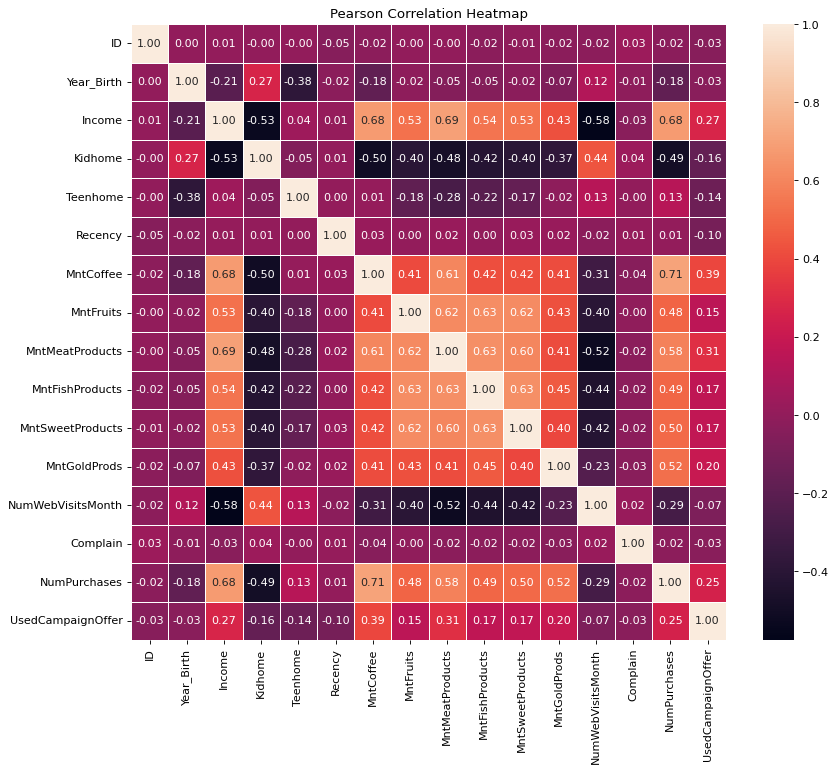

In [125]:
corr = df.corr(method = 'pearson')
plt.figure(figsize=(12,10), dpi =80)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



**15**. Firstly, we need to define our perception of error. In this case, our estimation of error is the residual sum of squares. To be more precise, we are trying to define a function which can approximate the difference between our estimation and the exact value of the estimated parameter. Because of the reason that we want our estimation of error to be a positive number, and we want more sensitivity in case of wrong predictions with higher values, we considered the square of this error term. Next, we need to minimize this error term by putting its derivative equal to zero. We can find our parameters' values and the line's equation by minimizing this error function.

Based on the above formula, we implemented the function below to compute the parameters of a simple linear regression.



In [126]:
def simple_linear_regression(input_feature, output):
    mean_input_feature = np.sum(input_feature)/np.shape(input_feature)[0]
    mean_output = np.sum(output)/np.shape(output)[0]
    sum_num = 0
    sum_den = 0
    for i in range(np.shape(input_feature)[0]):
      sum_num = sum_num + ((input_feature[i]-mean_input_feature)*(output[i]-mean_output))
      sum_den = sum_den + (input_feature[i]-mean_input_feature)**2
    alpha = sum_num/sum_den
    beta = mean_output - alpha*mean_input_feature
    return alpha, beta

Now we completed this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope.

In [127]:
def get_regression_predictions(input_feature, bias, slope):
    predictions = []
    for i in range(np.shape(input_feature)[0]):
      predictions.append(input_feature[i]*slope + bias)
    return predictions

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

We completed the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope.

In [128]:
def get_root_mean_square_error(predicted_values, outputs):
    summation = 0
    for i in range(np.shape(predicted_values)[0]):
      summation = summation + (predicted_values[i]-outputs[i])**2
    root_mean_square_error = (summation/np.shape(predicted_values)[0])**0.5
    return root_mean_square_error

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

We completed the following function to calculate the R2 score of a given input_feature, output, bias, and slope.

In [129]:
def get_r2_score(predicted_values, outputs):
    sum_num = 0
    sum_den = 0
    mean_output = np.sum(outputs)/np.shape(outputs)[0]
    for i in range(np.shape(predicted_values)[0]):
      sum_num = sum_num + (outputs[i]-predicted_values[i])**2
      sum_den = sum_den + (outputs[i]-mean_output)**2
    r2_score = 1 - (sum_num/sum_den)
    return r2_score

**16**. Now we calculated the fitness of the model by choosing our feature. In this section, we chose the amount spent on coffee in the last two years as our selected feature. After and during Data Preprocessing when we saw the Pearson Correlation Heatmap or scatter and hexbin plots, we realized that this feature has more correlation compared to other features. Because of this reason, we believe that the chosen feature will have more accurate outcomes.



**17**. R2 Score (Coefficient of Determination), RMSE (Root Mean Squared Error), MSE (Mean Squared Error), and RSS (Residual Sum of Squares) are commonly used metrics for evaluating the performance of regression models. [9]

**R2 Score (Coefficient of Determination):**

The R2 score estimates the proportion of the variance in the target feature which is predicted from the independent variables called features. Its value ranges from 0 to 1 and R2 equal to 1 means that our fit is perfect.

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

**RMSE (Root Mean Squared Error):**

By using RMSE we average the magnitude of the errors between predicted and actual values. It is the square root of the average of squared differences between predicted and actual values.
$$RMSE = \sqrt\frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{n} $$

**MSE (Mean Squared Error):**

MSE is the average of the squared differences between predicted and actual values. It is very similar to RMSE but without the square root term, and this fact makes it more sensitive to large errors.
$$MSE = \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{n} $$

**RSS (Residual Sum of Squares):**

RSS calculate the sum of the squared differences between the actual and predicted values in a regression model. It is used to measure the total error of the model.

$$RSS = {\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2} $$
Overall, a higher R2 score indicates a better fit, a lower RMSE indicates better predictive performance, MSE is like RMSE, but it is more sensitive to larger errors and RSS is an estimate of error which lower RSS values indicate better model fit.



In this section, we considered 80% of the dataset for training and the remaining 20% for testing because we do not have any hyperparameters and there is no need to hold any portion of the data for validation set.

Now we compute the alpha, beta, root mean square error and R2 score for our selected feature.



In [130]:
designated_feature_list = ['MntCoffee']
train_last_index = int(np.floor(np.shape(df[designated_feature_list[0]])[0]*0.8))
MntCoffee_train = list(df[designated_feature_list[0]][0:train_last_index])
NumPurchases_train = list(df['NumPurchases'][0:train_last_index])
MntCoffee_test = list(df[designated_feature_list[0]][train_last_index:np.shape(df[designated_feature_list[0]])[0]])
NumPurchases_test = list(df['NumPurchases'][train_last_index:np.shape(df[designated_feature_list[0]])[0]])
alpha_beta = simple_linear_regression(MntCoffee_train, NumPurchases_train)
predictions = get_regression_predictions(MntCoffee_test, alpha_beta[1], alpha_beta[0])
root_mean_square_error = get_root_mean_square_error(predictions, NumPurchases_test)
r2_score = get_r2_score(predictions, NumPurchases_test)

We can do this process for other features.

In [131]:
cols = ['Income', 'Kidhome', 'Teenhome', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
root_mean_square_error_cols = []
r2_score_cols = []
for i in range(len(cols)):
  train_last_index = int(np.floor(np.shape(df[cols[i]])[0]*0.8))
  MntCoffee_train = list(df[cols[i]][0:train_last_index])
  NumPurchases_train = list(df['NumPurchases'][0:train_last_index])
  MntCoffee_test = list(df[cols[i]][train_last_index:np.shape(df[cols[i]])[0]])
  NumPurchases_test = list(df['NumPurchases'][train_last_index:np.shape(df[cols[i]])[0]])
  alpha_beta = simple_linear_regression(MntCoffee_train, NumPurchases_train)
  predictions = get_regression_predictions(MntCoffee_test, alpha_beta[1], alpha_beta[0])
  root_mean_square_error_cols.append(get_root_mean_square_error(predictions, NumPurchases_test))
  r2_score_cols.append(get_r2_score(predictions, NumPurchases_test))

**18**. Now we can see the root mean square error and R2 score for different features, including the one that we selected. We can see here that our chosen feature shows the best results compared to other features. Thus, we chose the right feature because it has the highest R2 score and the lowest root mean square error among all. After our chosen feature, customer's yearly household income is at the second place and this shows that Pearson Correlation is a good tool for finding the best features.



In [132]:
print('The root mean square error for linear regression using MntCoffee (the selected feature) feature is: ' + str(root_mean_square_error))
print('The R2 score for linear regression using MntCoffee feature (the selected feature) is: ' + str(r2_score))
print('The root mean square error for linear regression using Income feature is: ' + str(root_mean_square_error_cols[0]))
print('The R2 score for linear regression using Income feature is: ' + str(r2_score_cols[0]))
print('The root mean square error for linear regression using Kidhome feature is: ' + str(root_mean_square_error_cols[1]))
print('The R2 score for linear regression using Kidhome feature is: ' + str(r2_score_cols[1]))
print('The root mean square error for linear regression using Teenhome feature is: ' + str(root_mean_square_error_cols[2]))
print('The R2 score for linear regression using Teenhome feature is: ' + str(r2_score_cols[2]))
print('The root mean square error for linear regression using MntFruits feature is: ' + str(root_mean_square_error_cols[3]))
print('The R2 score for linear regression using MntFruits feature is: ' + str(r2_score_cols[3]))
print('The root mean square error for linear regression using MntMeatProducts feature is: ' + str(root_mean_square_error_cols[4]))
print('The R2 score for linear regression using MntMeatProducts feature is: ' + str(r2_score_cols[4]))
print('The root mean square error for linear regression using MntFishProducts feature is: ' + str(root_mean_square_error_cols[5]))
print('The R2 score for linear regression using MntFishProducts feature is: ' + str(r2_score_cols[5]))
print('The root mean square error for linear regression using MntSweetProducts feature is: ' + str(root_mean_square_error_cols[6]))
print('The R2 score for linear regression using MntSweetProducts feature is: ' + str(r2_score_cols[6]))
print('The root mean square error for linear regression using MntGoldProds feature is: ' + str(root_mean_square_error_cols[7]))
print('The R2 score for linear regression using MntGoldProds feature is: ' + str(r2_score_cols[7]))

The root mean square error for linear regression using MntCoffee (the selected feature) feature is: 5.330423348812213
The R2 score for linear regression using MntCoffee feature (the selected feature) is: 0.5240805595579634
The root mean square error for linear regression using Income feature is: 5.586948045361687
The R2 score for linear regression using Income feature is: 0.477171437234833
The root mean square error for linear regression using Kidhome feature is: 6.861833080164961
The R2 score for linear regression using Kidhome feature is: 0.21133904805222437
The root mean square error for linear regression using Teenhome feature is: 7.698977680239436
The R2 score for linear regression using Teenhome feature is: 0.007167097464221728
The root mean square error for linear regression using MntFruits feature is: 6.569034807288561
The R2 score for linear regression using MntFruits feature is: 0.27720828431252964
The root mean square error for linear regression using MntMeatProducts feature

This function returns the output of a polynomial given its coefficients and x value.

In [133]:
def poly_fun(x, coe):
    order = len(coe)
    y = 0
    for i in range(order):
        y += coe[i]*x**i
    return y

We can see the visualization of the selected feature's linear model and our trained data using the below cell.


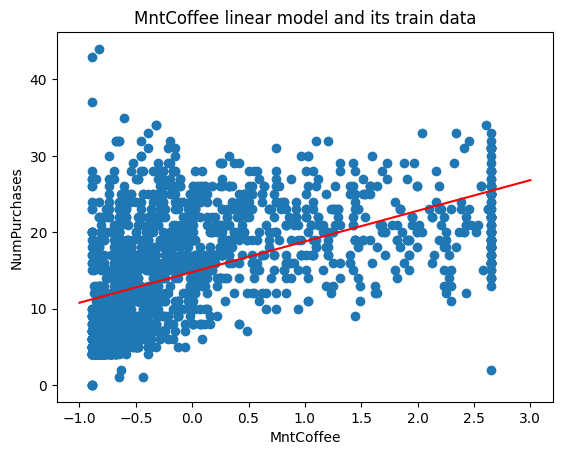

In [134]:
plt.scatter(MntCoffee_train,NumPurchases_train)
x = np.linspace(-1, 3, 1000000)
coe = [alpha_beta[1], alpha_beta[0]]
plt.plot(x, poly_fun(x, coe), 'r')
plt.title("MntCoffee linear model and its train data")
plt.xlabel("MntCoffee")
plt.ylabel("NumPurchases")
plt.show()

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, we completed this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. The np.dot() method returns the dot product of two vector, which is the sum of the products of the corresponding elements of the two vectors. By using this method, we can vectorize the process of training, which is easier and faster. From this cell we can have predictions by multiplying the features to their weights, and then we can add bias to predict our output.



In [135]:
def predict_output(feature_matrix, weights, bias):
    predictions = np.dot(feature_matrix, weights) + bias
    return predictions

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n features and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the parenthesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, we completed the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).




In [136]:
def feature_derivative(errors, feature):
    f_derivative = np.dot(feature.T, errors)
    return f_derivative

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, we completed the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature before computing our stopping criteria.

Bias updates are just like weights and there is a slight difference in its derivative term compared to weights. This difference comes from the fact that we derivative with respect to bias, which will not have a feature term multiplying in our gradient term. We can write bias gradient like this:
$$\frac{1}{m} * error $$



In [137]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    weights = initial_weights
    while True:
      predictions = predict_output(feature_matrix, weights, bias)
      errors = predictions - outputs
      gradient = feature_derivative(errors, feature_matrix)
      weights = weights - step_size*((1/np.shape(feature_matrix)[0])*gradient)
      bias = bias - step_size*((1/np.shape(feature_matrix)[0])*np.sum(errors))
      if np.linalg.norm(gradient) < tolerance:
        break
    return weights, bias

Utility functions for multiple regression.

In [138]:
def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """
    # First we rearrange our test data
    test_last_index = int(np.floor(np.shape(df[chosen_features[0]])[0]*0.8))
    main_0 = df[chosen_features[0]][0:test_last_index]
    for i in range(np.shape(chosen_features)[0]-1):
      main_df = pd.concat([main_0, df[chosen_features[i+1]][0:test_last_index]], axis=1)
      main_0 = main_df
    # This is our target values
    df_target = df['NumPurchases'][0:test_last_index]
    """
    Yes, selecting different initial weights make difference by the time we
    spend on reaching the desired tolerance. It can affect the fact whether our
    model will converge or not.
    """
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-7,
        'bias': 0
    }

    chosen_feature_dataframe = main_df
    """
    Normalizing helps us to ensure algorithmic stability and decrease the
    sensitivity of the scale of input features on our model.
    As a result of doing this, convergence and performance of our algorithm gets
    better.
    """
    chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = df_target
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, we chose two features and implemented multiple regression on them. The heatmap plot of the correlations between each column of the data frame after our Data Preprocessing methods showed us that MntCoffee and Income columns have the highest correlation with our target column. Consequently, we chose these two features as our selected features.

In [139]:
chosen_features = ['MntCoffee', 'Income']
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

Test data for finding our model's predictions.

In [140]:
train_last_index = int(np.floor(np.shape(df[chosen_features[0]])[0]*0.8))
test_0 = df[chosen_features[0]][train_last_index:np.shape(df[chosen_features[0]])[0]]
for i in range(np.shape(chosen_features)[0]-1):
    main_df_test = pd.concat([test_0, df[chosen_features[i+1]][train_last_index:np.shape(df[chosen_features[i+1]])[0]]], axis=1)
    test_0 = main_df_test
chosen_feature_dataframe_test = normalize_features(chosen_features, main_df_test)
chosen_feature_matrix_test = chosen_feature_dataframe_test.to_numpy()
predictions = predict_output(chosen_feature_matrix_test, train_weights, bias)

Here we can see the fact that our results in terms of R2 score and root mean square error improved compared to One Feature Regression.

In [141]:
df_target_test = df['NumPurchases'][train_last_index:np.shape(df[chosen_features[0]])[0]]
target_matrix_test = df_target_test.to_numpy()
r2_score_two_feature_regression = get_r2_score(predictions, target_matrix_test)
root_mean_square_error_two_feature_regression = get_root_mean_square_error(predictions, target_matrix_test)
print('The root mean square error using Two Feature Regression is: ' + str(root_mean_square_error_two_feature_regression))
print('The R2 score using Two Feature Regression is: ' + str(r2_score_two_feature_regression))

The root mean square error using Two Feature Regression is: 4.9509114113059765
The R2 score using Two Feature Regression is: 0.5894364868919256


## Three Feature Regression

In this part, we chose three features and implemented multiple regression on them. The heatmap plot of the correlations between each column of the data frame after our Data Preprocessing methods showed us that MntCoffee, Income and MntMeatProducts columns have the highest correlation with our target column. Consequently, we chose these three features as our selected features.

In [142]:
chosen_features = ['MntCoffee', 'Income', 'MntMeatProducts']
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

Test data for finding our model's predictions.

In [143]:
train_last_index = int(np.floor(np.shape(df[chosen_features[0]])[0]*0.8))
test_0 = df[chosen_features[0]][train_last_index:np.shape(df[chosen_features[0]])[0]]
for i in range(np.shape(chosen_features)[0]-1):
    main_df_test = pd.concat([test_0, df[chosen_features[i+1]][train_last_index:np.shape(df[chosen_features[i+1]])[0]]], axis=1)
    test_0 = main_df_test
chosen_feature_dataframe_test = normalize_features(chosen_features, main_df_test)
chosen_feature_matrix_test = chosen_feature_dataframe_test.to_numpy()
predictions = predict_output(chosen_feature_matrix_test, train_weights, bias)

Here we can see the fact that our results in terms of R2 score and root mean square error improved compared to Two Feature Regression.

In [144]:
df_target_test = df['NumPurchases'][train_last_index:np.shape(df[chosen_features[0]])[0]]
target_matrix_test = df_target_test.to_numpy()
r2_score_three_feature_regression = get_r2_score(predictions, target_matrix_test)
root_mean_square_error_three_feature_regression = get_root_mean_square_error(predictions, target_matrix_test)
print('The root mean square error using Three Feature Regression is: ' + str(root_mean_square_error_three_feature_regression))
print('The R2 score using Three Feature Regression is: ' + str(r2_score_three_feature_regression))

The root mean square error using Three Feature Regression is: 4.906183740477946
The R2 score using Three Feature Regression is: 0.5968212279575025


## Five Feature Regression

Finally, we repeated the steps for five features.

In this part, we chose five features and implemented multiple regression on them. The heatmap plot of the correlations between each column of the data frame after our Data Preprocessing methods showed us that MntCoffee, Income, MntMeatProducts, MntGoldProds and MntSweetProducts columns have the highest correlation with our target column. Consequently, we chose these five features as our selected features.

In [145]:
chosen_features = ['MntCoffee', 'Income', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts']
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

Test data for finding our model's predictions.

In [146]:
train_last_index = int(np.floor(np.shape(df[chosen_features[0]])[0]*0.8))
test_0 = df[chosen_features[0]][train_last_index:np.shape(df[chosen_features[0]])[0]]
for i in range(np.shape(chosen_features)[0]-1):
    main_df_test = pd.concat([test_0, df[chosen_features[i+1]][train_last_index:np.shape(df[chosen_features[i+1]])[0]]], axis=1)
    test_0 = main_df_test
chosen_feature_dataframe_test = normalize_features(chosen_features, main_df_test)
chosen_feature_matrix_test = chosen_feature_dataframe_test.to_numpy()
predictions = predict_output(chosen_feature_matrix_test, train_weights, bias)

Here we can see the fact that our results in terms of R2 score and root mean square error improved compared to Three Feature Regression.

Overall, we saw that by adding proper features, the model's predictions became more accurate, and this fact is true for our linear regression model which only had one feature. Thus, among these regression models, Five Feature Regression had the best accuracy and the linear regression model was the worst one.





In [147]:
df_target_test = df['NumPurchases'][train_last_index:np.shape(df[chosen_features[0]])[0]]
target_matrix_test = df_target_test.to_numpy()
r2_score_five_feature_regression = get_r2_score(predictions, target_matrix_test)
root_mean_square_error_five_feature_regression = get_root_mean_square_error(predictions, target_matrix_test)
print('The root mean square error using Five Feature Regression is: ' + str(root_mean_square_error_five_feature_regression))
print('The R2 score using Five Feature Regression is: ' + str(r2_score_five_feature_regression))

The root mean square error using Five Feature Regression is: 4.552050577740272
The R2 score using Five Feature Regression is: 0.652924308343815


# Classification

We need to change our target column in a way that we can use our data in a Classification algorithm. We did this by creating the PurchaseRate list with the help of median. Hence, we labeled values higher or equal to median as 'High' and the lower ones as 'Low'.

In [148]:
PurchaseRate = []
for i in range(np.shape(df['NumPurchases'])[0]):
  if df['NumPurchases'][i] >= df['NumPurchases'].median():
      PurchaseRate.append('High')
  else:
      PurchaseRate.append('Low')

Here we make our train set and reshape it in a way that we can use it in further algorithms. We chose 80 percent of our data for training. The heatmap plot of the correlations between each column of the data frame after our Data Preprocessing methods showed us that MntCoffee, Income, MntMeatProducts, MntGoldProds and MntSweetProducts columns have the highest correlation with our target column. Consequently, we chose these five features as our selected features for this section. We could choose more features, but it does not worth its time and computational complexity.

In [149]:
train_last_index = int(np.floor(np.shape(df[chosen_features[0]])[0]*0.8))
chosen_features = ['MntCoffee', 'MntMeatProducts', 'Income', 'MntGoldProds', 'MntSweetProducts']
train_0 = df[chosen_features[0]][0:train_last_index]
for i in range(np.shape(chosen_features)[0]-1):
    main_df_train = pd.concat([train_0, df[chosen_features[i+1]][0:train_last_index]], axis=1)
    train_0 = main_df_train

train_0_list = []
for i in range(len(train_0[chosen_features[0]])):
  for column in chosen_features:
    train_0_list.append(train_0[column].iloc[i])
reshaped_train_0 = np.array(train_0_list).reshape(int(len(train_0_list)/len(chosen_features)),len(chosen_features))
reshaped_train_0 = reshaped_train_0.tolist()
PurchaseRate_train = PurchaseRate[0:train_last_index]

In this project, we considered 80% of the dataset for training and the remaining 20% for test and validation of our models. Here, we need to tune our hyperparameters by using the validation set. For this reason, in this section we considered 80% of the dataset for training and 10% for testing and validation sets each.



In [150]:
test_validation_0 = df[chosen_features[0]][train_last_index:np.shape(df[chosen_features[0]])[0]]
for i in range(np.shape(chosen_features)[0]-1):
    main_df_test = pd.concat([test_validation_0, df[chosen_features[i+1]][train_last_index:np.shape(df[chosen_features[i+1]])[0]]], axis=1)
    test_validation_0 = main_df_test

test_validation_0_list = []
for i in range(len(test_validation_0[chosen_features[0]])):
  for column in chosen_features:
    test_validation_0_list.append(test_validation_0[column].iloc[i])
reshaped_test_validation_0 = np.array(test_validation_0_list).reshape(int(len(test_validation_0_list)/len(chosen_features)),len(chosen_features))
reshaped_test_validation_0 = reshaped_test_validation_0.tolist()
test_last_index = int(np.floor(np.shape(reshaped_test_validation_0)[0]*0.5))
reshaped_test_0 = reshaped_test_validation_0[0:test_last_index]
reshaped_validation_0 = reshaped_test_validation_0[test_last_index:np.shape(reshaped_test_validation_0)[0]]

# Decision Tree

Here, we can choose the best number for maximum depth of our decision tree using the validation set. We can see that after max_depth = 5 our model begins to overfit. Hence, we chose max_depth = 5 as our selected number for maximum depth of the decision tree.

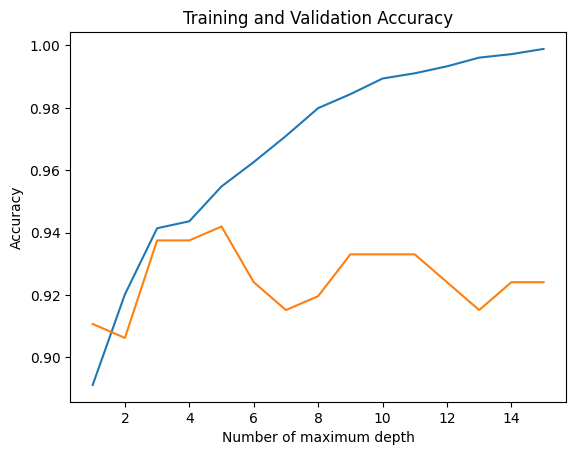

In [156]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for max_depth in range(1,16):
  DT_clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  DT_clf = DT_clf.fit(reshaped_train_0, PurchaseRate_train)
  score_validation.append(DT_clf.score(reshaped_train_0, PurchaseRate_train))
  score_train.append(DT_clf.score(reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 15, 15, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of maximum depth")
plt.ylabel("Accuracy")
plt.show()

Here is our selected tree.

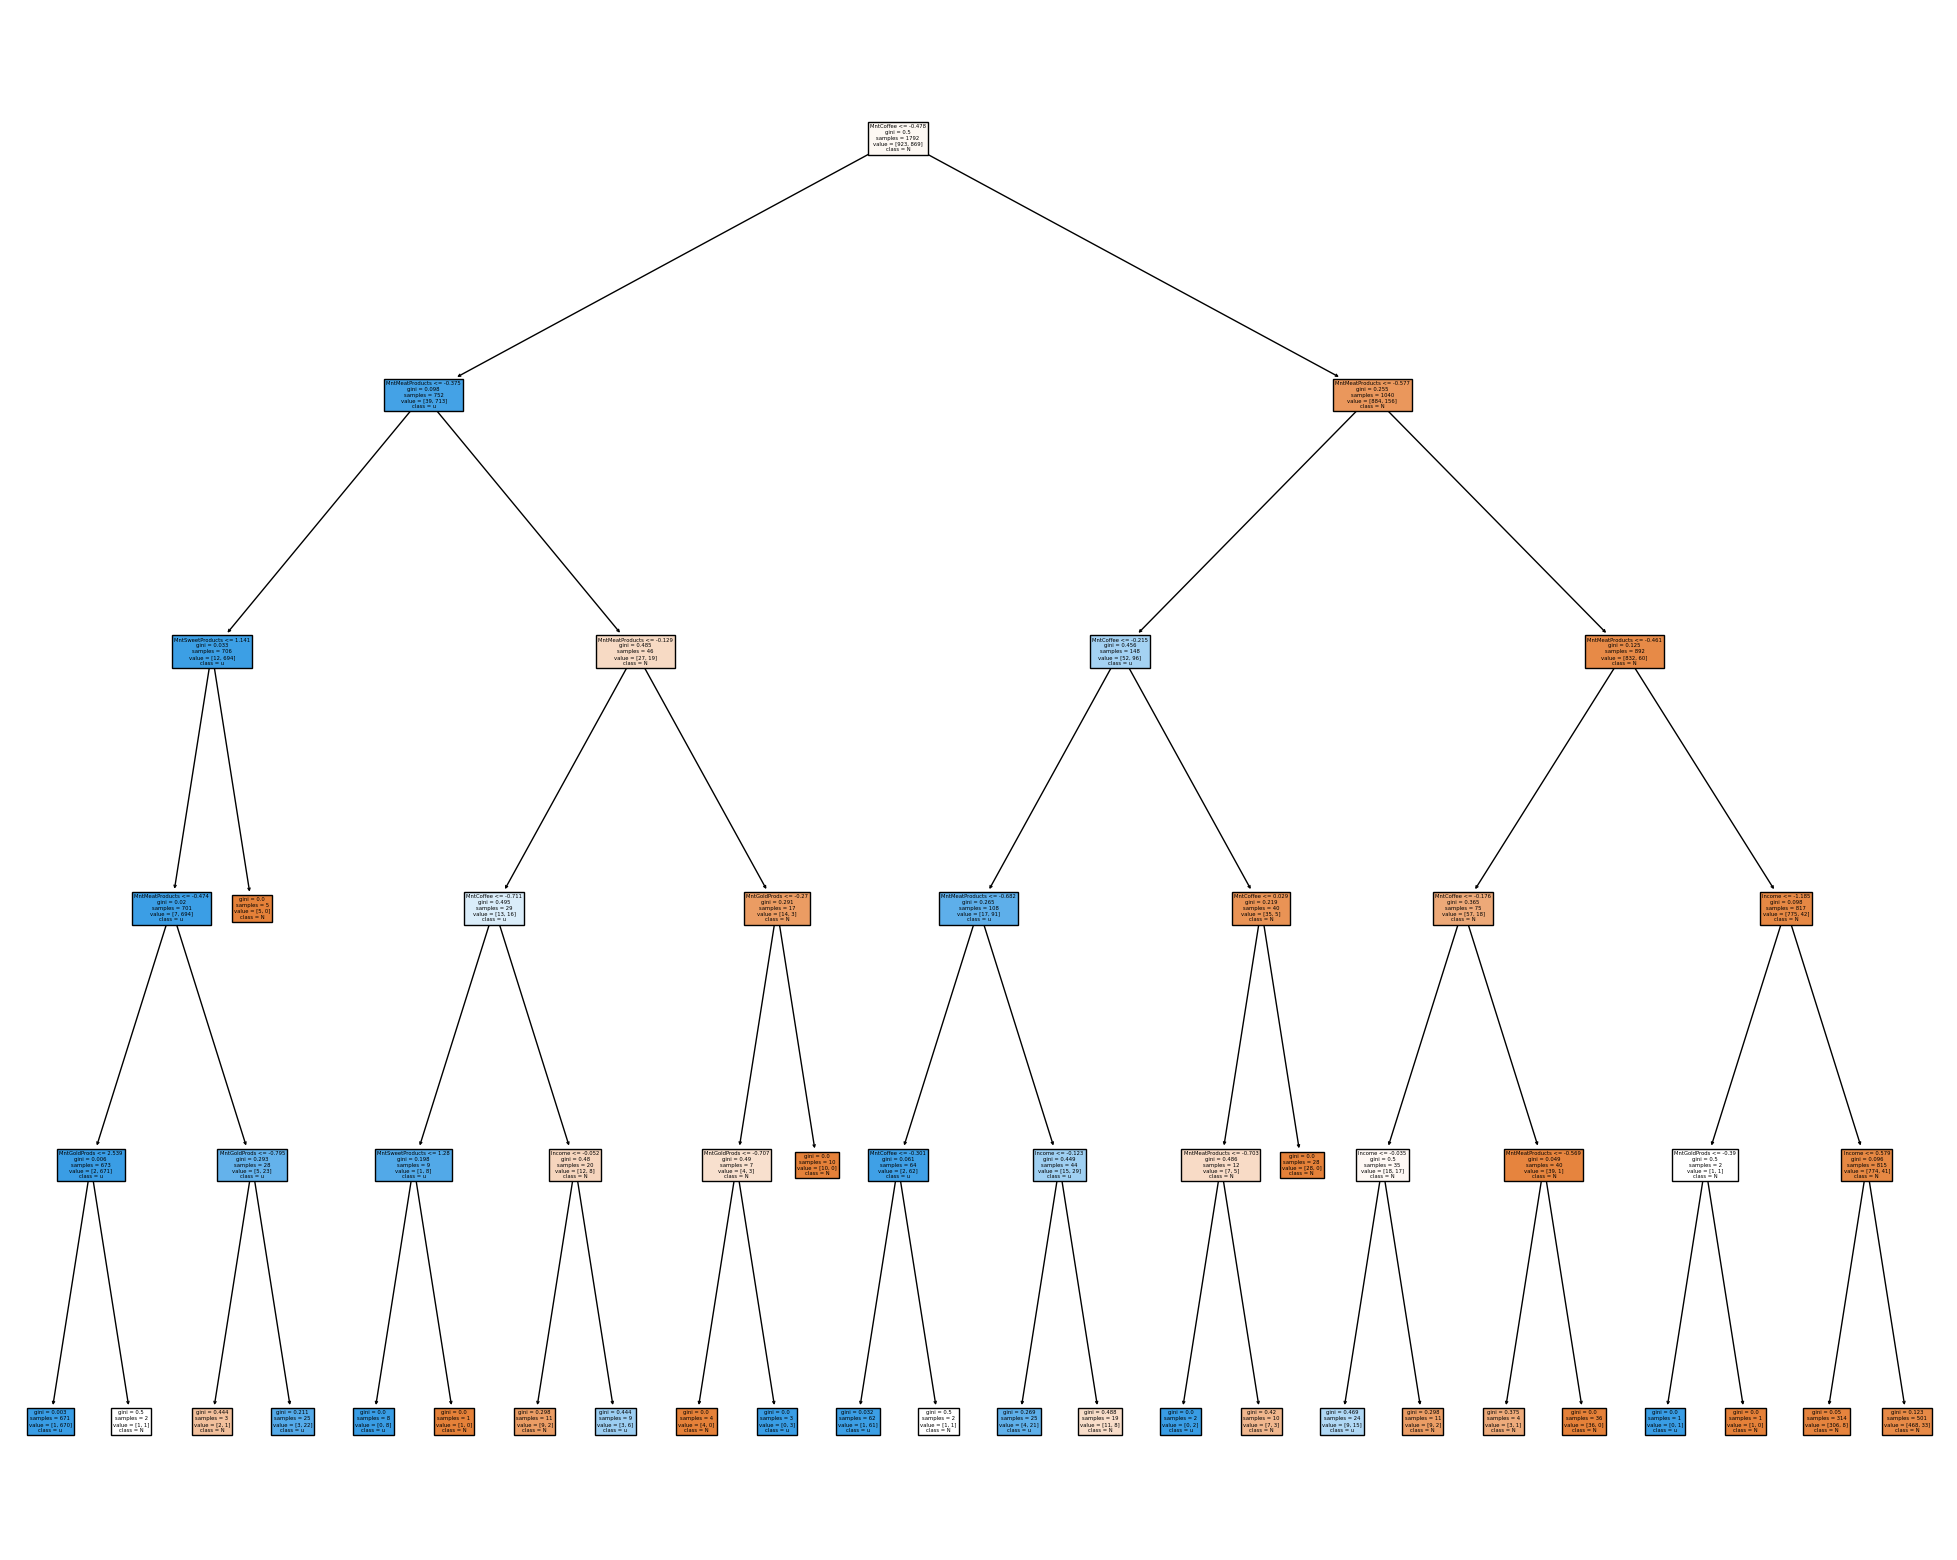

In [157]:
DT_clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
DT_clf = DT_clf.fit(reshaped_train_0, PurchaseRate_train)
fig = plt.figure(figsize=(25,20))
t_p = tree.plot_tree(DT_clf, feature_names=chosen_features, class_names='NumPurchases', filled=True)

Confusion Matrix of our model for the validation set.

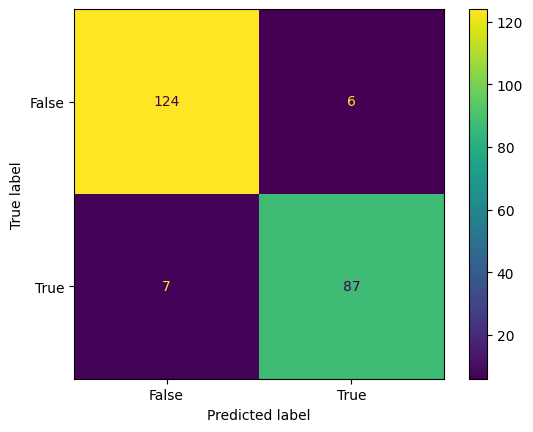

In [158]:
Predicted_Decision_Tree = DT_clf.predict(reshaped_validation_0)
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_actual, Predicted_Decision_Tree)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Confusion Matrix of our model for the test set.

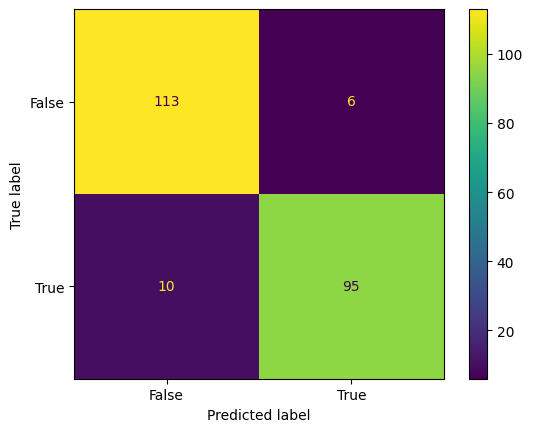

In [159]:
Predicted_Decision_Tree = DT_clf.predict(reshaped_test_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_Decision_Tree)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Now we can see our test set accuracy.

In [160]:
score_PurchaseRate_test_actual = DT_clf.score(reshaped_test_0,PurchaseRate_test_actual)
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 92.85714285714286


# K-Nearest Neighbors

Here, we can choose the best number for neighbors of our K-Nearest Neighbors using the validation set. We can see that in n_neighbors = 13 our model's training set begins to have an accuracy almost the same as our validation set. Hence, we chose n_neighbors = 13 as our selected number for maximum depth of the K-Nearest Neighbors because the validation set accuracy was at its highest compared to other n_neighbors.



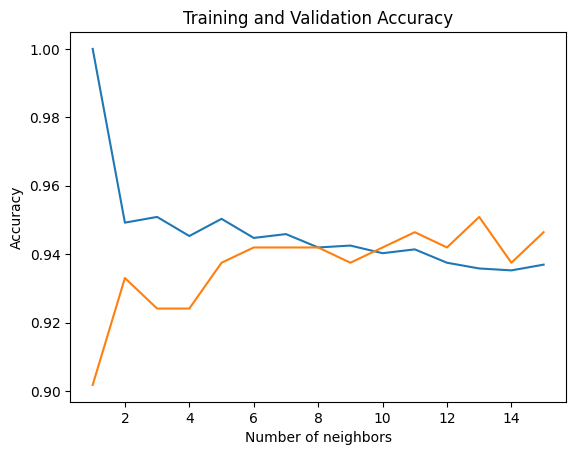

In [166]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for n in range(1,16):
  KN_neigh_clf = KNeighborsClassifier(n_neighbors=n)
  KN_neigh_clf = KN_neigh_clf.fit(reshaped_train_0, PurchaseRate_train)
  score_validation.append(KN_neigh_clf.score(reshaped_train_0, PurchaseRate_train))
  score_train.append(KN_neigh_clf.score(reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 15, 15, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

Here is our selected model.

In [167]:
KN_neigh_clf = KNeighborsClassifier(n_neighbors=13)
KN_neigh_clf = KN_neigh_clf.fit(reshaped_train_0, PurchaseRate_train)

Confusion Matrix of our model for the validation set.

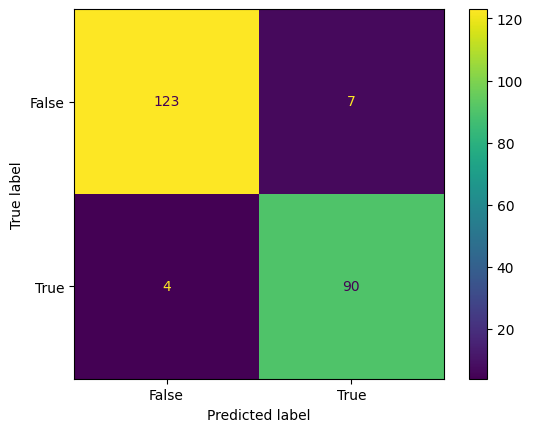

In [168]:
Predicted_KN_neigh = KN_neigh_clf.predict(reshaped_validation_0)
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_actual, Predicted_KN_neigh)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Confusion Matrix of our model for the test set.

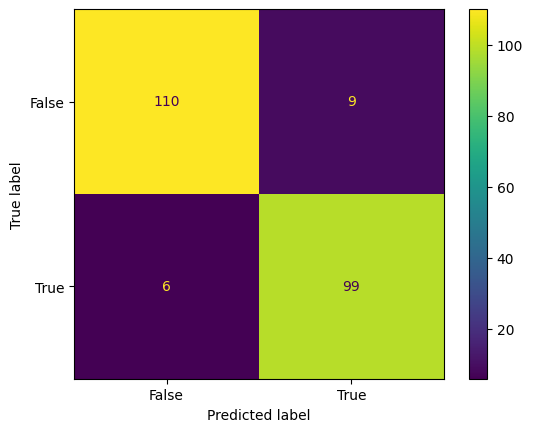

In [169]:
Predicted_KN_neigh = KN_neigh_clf.predict(reshaped_test_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_KN_neigh)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Now we can see our test set accuracy.

In [170]:
score_PurchaseRate_test_actual = KN_neigh_clf.score(reshaped_test_0,PurchaseRate_test_actual)
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 93.30357142857143


# Logistic Regression

Here, we can choose the best hpyerparameters for our Logistic Regression using the validation set.

**20**. Because of the fact that we have more than one hyperparameter, we used GridSearchCV for finding the best hpyerparameter.

In [ ]:
grid = {"C":np.logspace(1,20,20), "penalty":["l1","l2"]}
LR_clf = LogisticRegression()
LR_clf_cv = GridSearchCV(LR_clf, grid, cv=10)
LR_clf_cv.fit(reshaped_train_0, PurchaseRate_train)
print("Tuned hpyerparameters are: ",LR_clf_cv.best_params_)
print("Accuracy is :",LR_clf_cv.best_score_)

By using these hyperparameters the best model is like below.

In [172]:
LR_clf = LogisticRegression(C=10, penalty="l2")
LR_clf.fit(reshaped_train_0, PurchaseRate_train)

LogisticRegression(C=10)

Now we just need to evaluate test set and there is no need for validation set because of the fact that we already have our hyperparameters by using GridSearchCV. Confusion Matrix of our model for the test set.

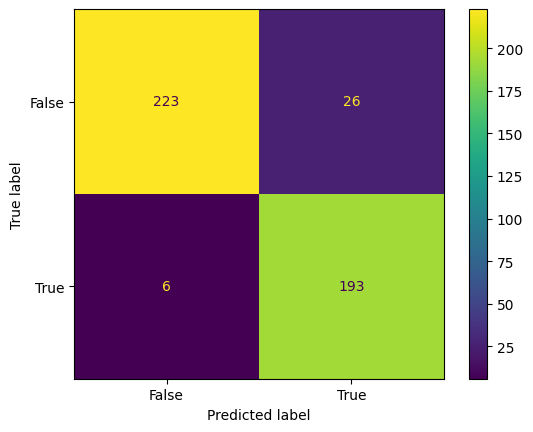

In [173]:
Predicted_LR = LR_clf.predict(reshaped_test_validation_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_LR)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Now we can see our test set accuracy.

In [174]:
score_PurchaseRate_test_actual = LR_clf.score(reshaped_test_validation_0,PurchaseRate[int(len(PurchaseRate)*0.8):int(len(PurchaseRate))])
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 92.85714285714286


**21**. Overfitting and underfitting are two terms that show us how well a model generalizes to new and unseen data. [10]

**Overfitting:** Overfitting happens when our model learns the training data very well, and it can consider noises as meaningful patterns. As a result, the model performs well on the training data but poorly on new and unseen data. These models often have high variance and are too complex.

**Underfitting:** Underfitting happens when a model is too simple to capture the underlying patterns in the training data. This kind of model performs poorly on both the training data and the unseen data. These models often have high bias and are not complex enough.

In this project, we were trying to identify a model complexity that minimizes both bias and variance for having an optimal performance on unseen data. Because of this reason, we calculated the Training and Validation accuracies and found the right hyperparameters. At last, we used test data to make sure that our model is not overfit or underfit.



**22**. Firstly, we did our analysis without limiting the effect of the outliers on the model or removing impossible values. We saw that these two procedures are essential for having more accurate results. Secondly, we saw that our model did better by using standardization compared to not using it.

**23**. Here is our decision tree, which had a very well accuracy on our test set.



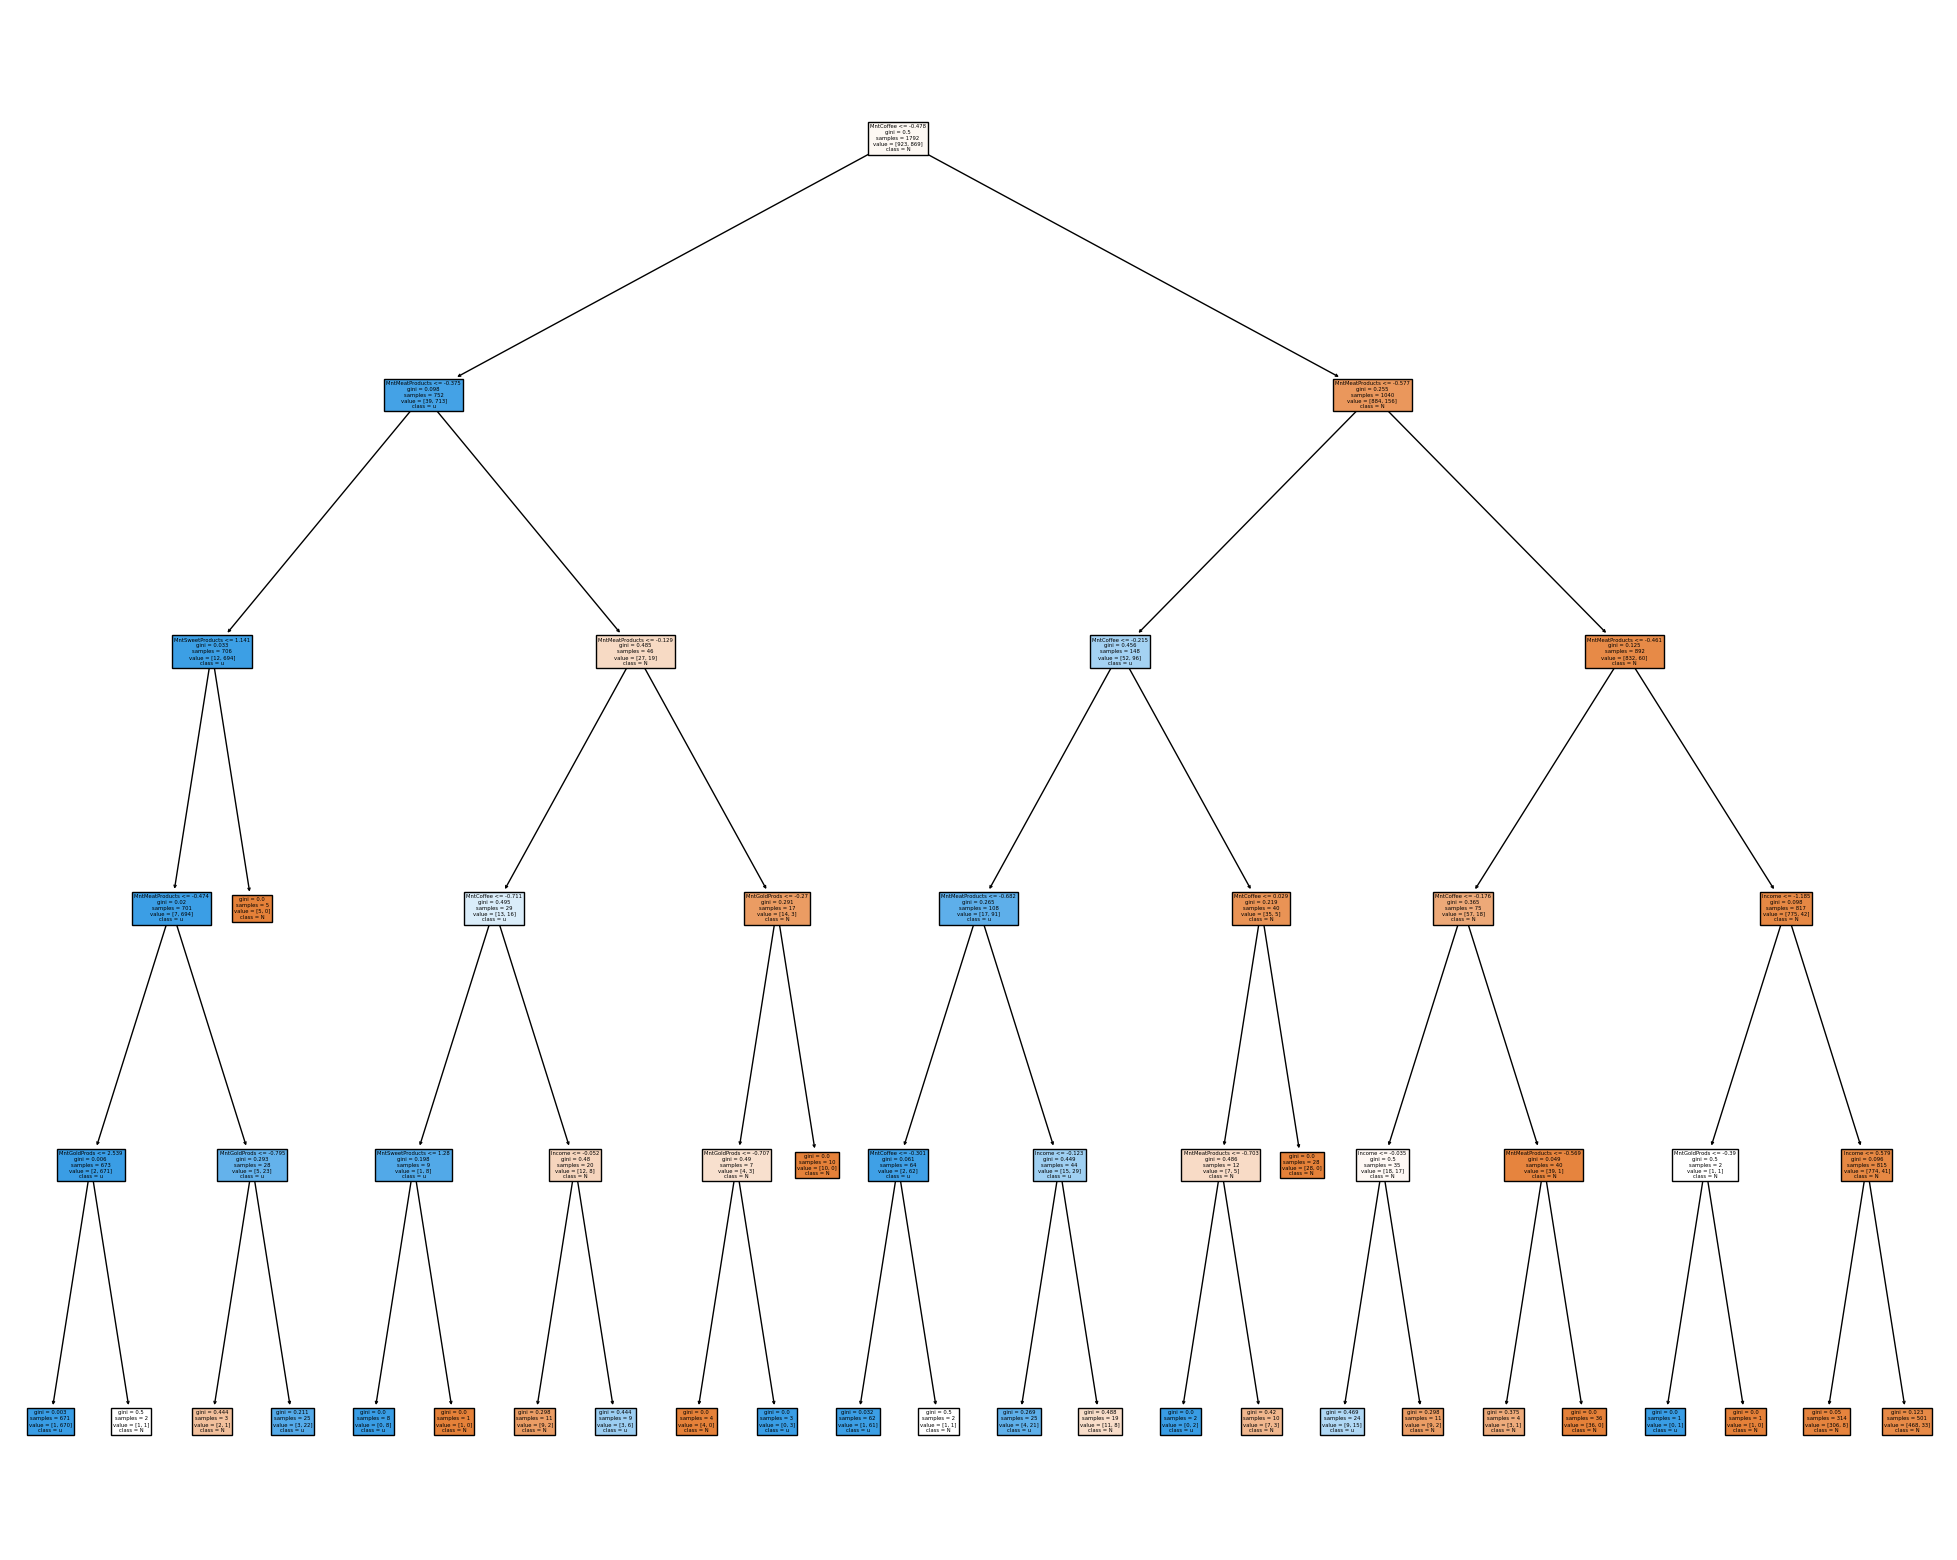

In [175]:
fig = plt.figure(figsize=(25,20))
t_p = tree.plot_tree(DT_clf, feature_names=chosen_features, class_names='NumPurchases', filled=True)

# Ensemble Learning and Random Forest

**24**. Random forest have several hyperparameter and the two selected ones for our model are: [11]

**n_estimators:** The number of trees in the forest, and its default number is 100. Higher values of this hyperparameter generally lead to better performance, but it also increases our computational cost. We use our validation set to find an optimal number for this hyperparameter.

**max_depth:** The maximum depth of each decision tree in the forest. It is a good idea to limit the maximum depth to prevent overfitting. We try different values and use a validation set to find an optimal depth.

Here, we can choose the best number for maximum depth of our decision tree using the validation set. We can see that after max_depth = 3 our model begins to overfit. Hence, we chose max_depth = 3 as our selected number for maximum depth of the Random Forest algorithm.



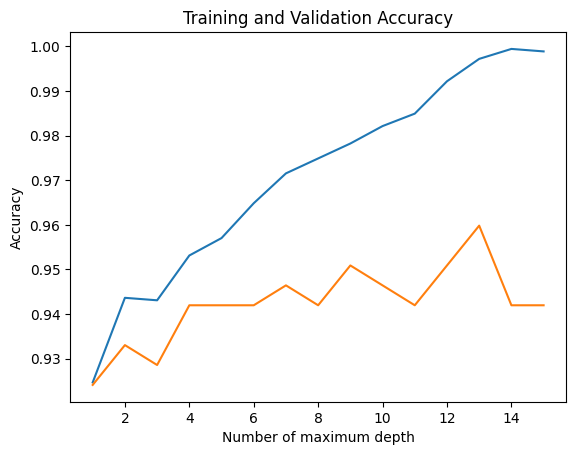

In [176]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for max_depth in range(1,16):
  RF_clf = RandomForestClassifier(max_depth=max_depth)
  RF_clf = RF_clf.fit(reshaped_train_0, PurchaseRate_train)
  score_validation.append(RF_clf.score(reshaped_train_0, PurchaseRate_train))
  score_train.append(RF_clf.score(reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 15, 15, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of maximum depth")
plt.ylabel("Accuracy")
plt.show()

Here, we can choose the best number for n_estimators of our decision tree using the validation set. we can see that after n_estimators = 30 our model begins to show no improvment. Hence, we chose n_estimators = 30 as our selected number for n_estimators of the Random Forest algorithm.

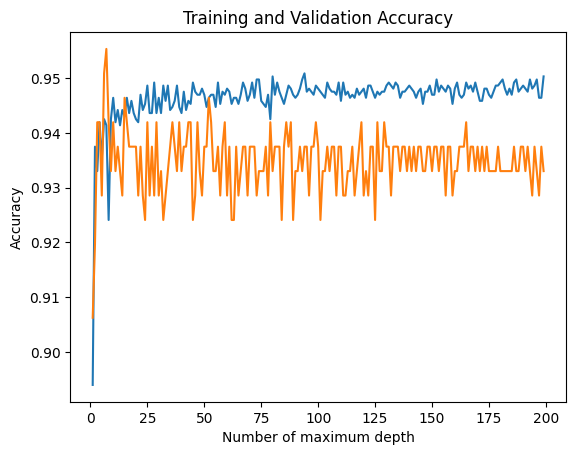

In [177]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for n_estimators in range(1,200):
  RF_clf = RandomForestClassifier(max_depth=3, n_estimators=n_estimators)
  RF_clf = RF_clf.fit(reshaped_train_0, PurchaseRate_train)
  score_validation.append(RF_clf.score(reshaped_train_0, PurchaseRate_train))
  score_train.append(RF_clf.score(reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 199, 199, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of maximum depth")
plt.ylabel("Accuracy")
plt.show()

By using these hyperparameters the best model is like below.

In [178]:
RF_clf = RandomForestClassifier(max_depth=3, n_estimators=30)
RF_clf = RF_clf.fit(reshaped_train_0, PurchaseRate_train)

Confusion Matrix of our model for the validation set.

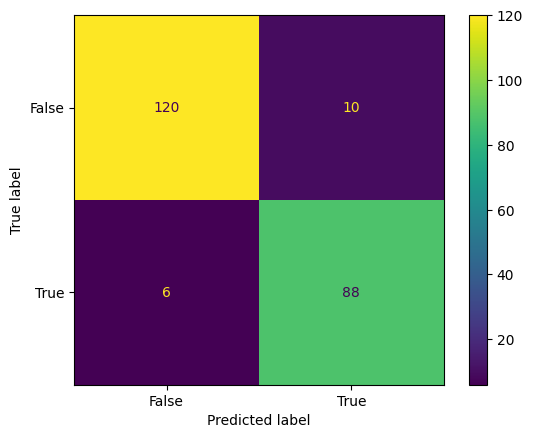

In [179]:
Predicted_RF = RF_clf.predict(reshaped_validation_0)
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_actual, Predicted_RF)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Confusion Matrix of our model for the test set.

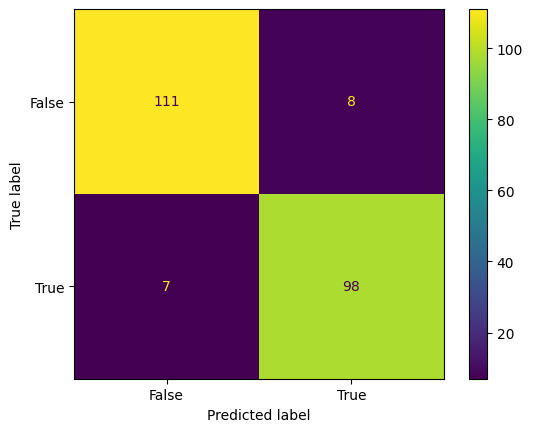

In [180]:
Predicted_RF = RF_clf.predict(reshaped_test_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_RF)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Now we can see our test set accuracy.

In [181]:
score_PurchaseRate_test_actual = RF_clf.score(reshaped_test_0,PurchaseRate_test_actual)
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 93.30357142857143


**25**. Bias refers to the error introduced by approximating a real-world problem. In this case, a simple model may fail to represent the complexity of the true data distribution and have high bias. Variance refers to the model's ability to predict the fluctuations in our training data. A model with high variance is doing very well on the training data but capturing noise and random fluctuations of this training data causes the model to act poorly on the test and unseen data. This error is from being too responsive to training data and somehow overfits the training data. Hence, we need to train our model in a way that it will not become too simple or complex to prevent bias and variance. [12]

Overall, Random Forest is better at managing the bias variance tradeoff than Decision Tree algorithm. Decision Tree tends to have high variance, which it can lead to overfitting. On the other hand, Random Forest has a lower variance which it can result in better generalization.





# Differential Privacy

**26**. Customers who contribute data to machine learning models can be confident that their data is not memorized by the model. As a result, it can reduce the risk of privacy breaches in a significant way. By adding noise, customers can make sure that their information will not use against them. They will not have fear about their data using to identify them.

**27**. Laplace noise is drawn from a Laplace distribution, and it is a symmetric distribution. It has a probability density function proportional to:[13] $$e^{\frac{|-x|}{b}}$$

Which b is its scale parameter.

The Exponential mechanism adds Exponential distributed noise to achieve differential privacy. Exponential noise is achieved from an Exponential distribution, and it is a non-symmetric distribution. It has a probability density function proportional to: $$e^{\frac{-x}{b}}$$

Which b is the scale parameter.



**28**. Here, we chose laplace method as our way of adding noise to data. After this analysis, we saw that our accuracy dropped in all classification methods compared to the time that our data did not hold any noise.



In [182]:
scale = 0.5
laplace_noise_train = np.random.laplace(0, scale, len(reshaped_train_0)*len(reshaped_train_0[0]))
laplace_noise_train = laplace_noise_train.reshape(int(len(laplace_noise_train)/len(chosen_features)),len(chosen_features))
noisy_reshaped_train_0 = np.array(reshaped_train_0) + laplace_noise_train

In [183]:
scale = 0.5
laplace_noise_test = np.random.laplace(0, scale, len(reshaped_test_0)*len(reshaped_test_0[0]))
laplace_noise_test = laplace_noise_test.reshape(int(len(laplace_noise_test)/len(chosen_features)),len(chosen_features))
noisy_reshaped_test_0 = np.array(reshaped_test_0) + laplace_noise_test

In [184]:
scale = 0.5
laplace_noise_validation = np.random.laplace(0, scale, len(reshaped_validation_0)*len(reshaped_validation_0[0]))
laplace_noise_validation = laplace_noise_validation.reshape(int(len(laplace_noise_validation)/len(chosen_features)),len(chosen_features))
noisy_reshaped_validation_0 = np.array(reshaped_validation_0) + laplace_noise_validation

# Decision Tree With Laplace Noise

In this section we do everything just like the classification section.

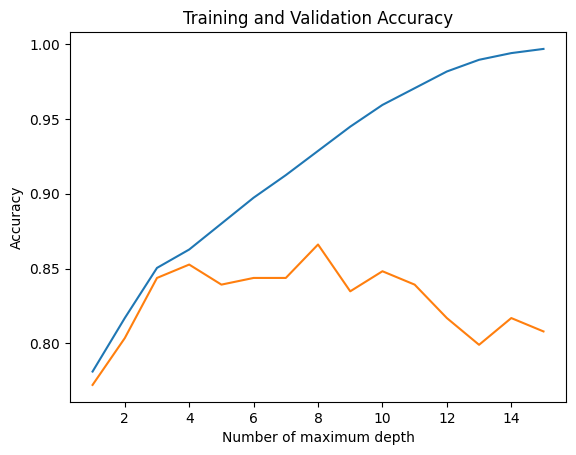

In [185]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for max_depth in range(1,16):
  DT_clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  DT_clf = DT_clf.fit(noisy_reshaped_train_0, PurchaseRate_train)
  score_validation.append(DT_clf.score(noisy_reshaped_train_0, PurchaseRate_train))
  score_train.append(DT_clf.score(noisy_reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 15, 15, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of maximum depth")
plt.ylabel("Accuracy")
plt.show()

In [186]:
DT_clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
DT_clf = DT_clf.fit(reshaped_train_0, PurchaseRate_train)

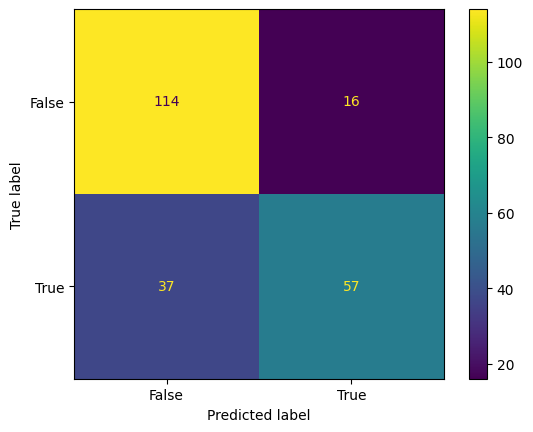

In [187]:
Predicted_Decision_Tree = DT_clf.predict(noisy_reshaped_validation_0)
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_actual, Predicted_Decision_Tree)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

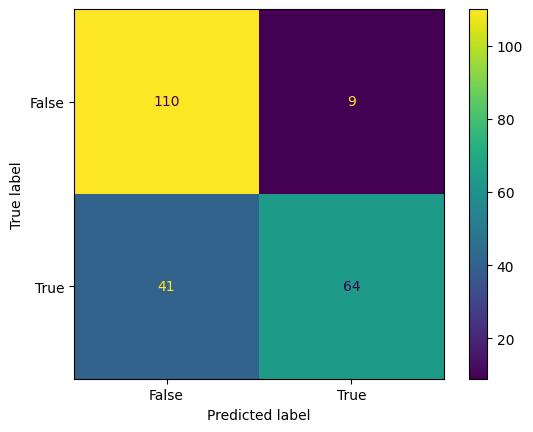

In [188]:
Predicted_Decision_Tree = DT_clf.predict(noisy_reshaped_test_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_Decision_Tree)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

In [189]:
score_PurchaseRate_test_actual = DT_clf.score(noisy_reshaped_test_0,PurchaseRate_test_actual)
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 77.67857142857143


# K-Nearest Neighbours With Laplace Noise

In this section we do everything just like the classification section.

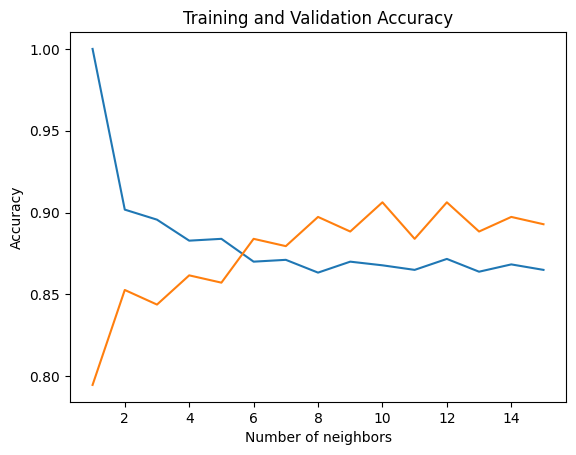

In [190]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for n in range(1,16):
  KN_neigh_clf = KNeighborsClassifier(n_neighbors=n)
  KN_neigh_clf = KN_neigh_clf.fit(noisy_reshaped_train_0, PurchaseRate_train)
  score_validation.append(KN_neigh_clf.score(noisy_reshaped_train_0, PurchaseRate_train))
  score_train.append(KN_neigh_clf.score(noisy_reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 15, 15, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [191]:
KN_neigh_clf = KNeighborsClassifier(n_neighbors=10)
KN_neigh_clf = KN_neigh_clf.fit(reshaped_train_0, PurchaseRate_train)

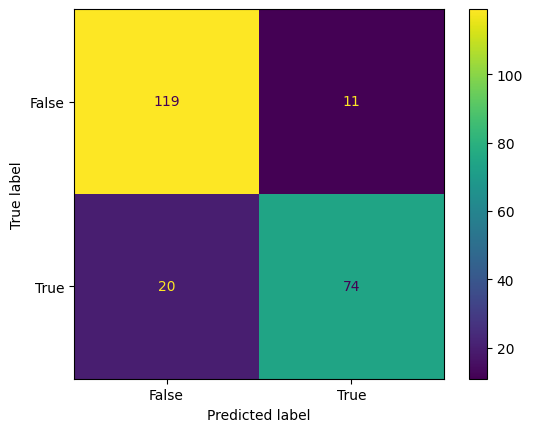

In [192]:
Predicted_KN_neigh = KN_neigh_clf.predict(noisy_reshaped_validation_0)
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_actual, Predicted_KN_neigh)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

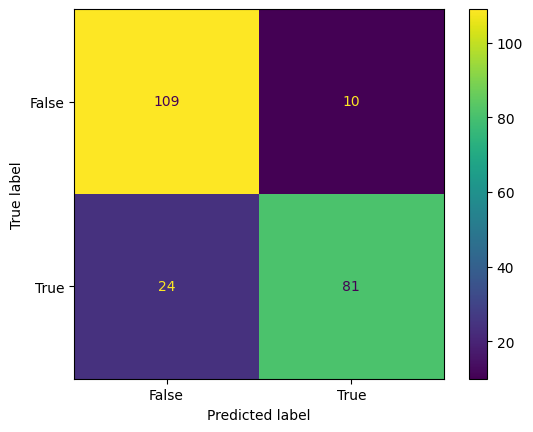

In [193]:
Predicted_KN_neigh = KN_neigh_clf.predict(noisy_reshaped_test_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_KN_neigh)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

In [194]:
score_PurchaseRate_test_actual = KN_neigh_clf.score(noisy_reshaped_test_0,PurchaseRate_test_actual)
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 84.82142857142857


# Logistic Regression With Laplace Noise

In this section we do everything just like the classification section.

In [195]:
grid = {"C":np.logspace(1,20,20), "penalty":["l1","l2"]}
LR_clf = LogisticRegression()
LR_clf_cv = GridSearchCV(LR_clf, grid, cv=10)
LR_clf_cv.fit(noisy_reshaped_train_0, PurchaseRate_train)
print("Tuned hpyerparameters are: ",LR_clf_cv.best_params_)
print("Accuracy is :",LR_clf_cv.best_score_)

Tuned hpyerparameters are:  {'C': 10.0, 'penalty': 'l2'}
Accuracy is : 0.86272191185599


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [196]:
LR_clf = LogisticRegression(C=10, penalty="l2")
LR_clf.fit(noisy_reshaped_train_0, PurchaseRate_train)

LogisticRegression(C=10)

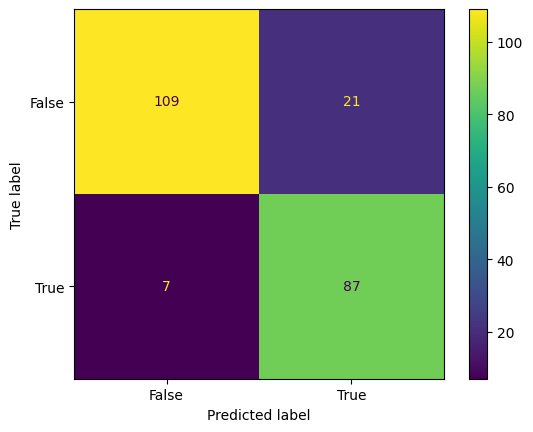

In [197]:
Predicted_LR = LR_clf.predict(noisy_reshaped_validation_0)
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_actual, Predicted_LR)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

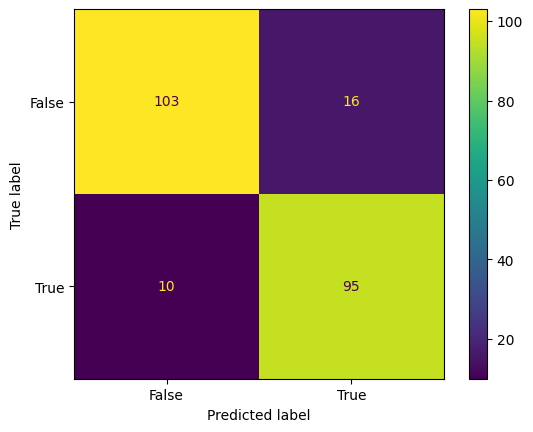

In [198]:
Predicted_LR = LR_clf.predict(noisy_reshaped_test_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_LR)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

In [199]:
score_PurchaseRate_test_actual = LR_clf.score(noisy_reshaped_test_0,PurchaseRate_test_actual)
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 88.39285714285714


# Random Forest With Laplace Noise

In this section we do everything just like the classification section.

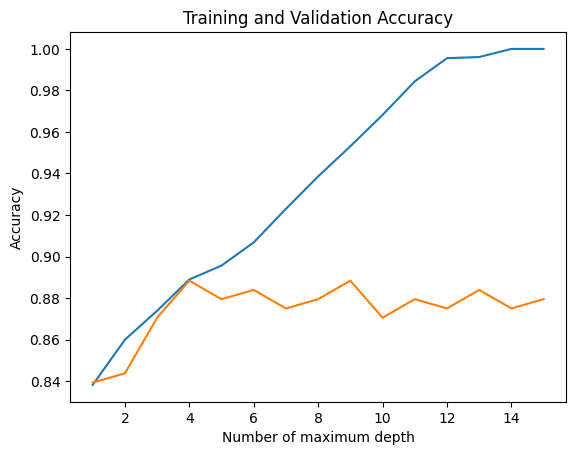

In [200]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for max_depth in range(1,16):
  RF_clf = RandomForestClassifier(max_depth=max_depth)
  RF_clf = RF_clf.fit(noisy_reshaped_train_0, PurchaseRate_train)
  score_validation.append(RF_clf.score(noisy_reshaped_train_0, PurchaseRate_train))
  score_train.append(RF_clf.score(noisy_reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 15, 15, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of maximum depth")
plt.ylabel("Accuracy")
plt.show()

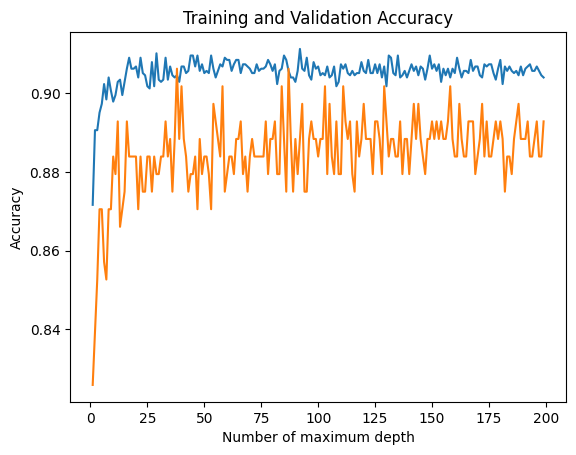

In [201]:
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
score_validation = []
score_train = []
for n_estimators in range(1,200):
  RF_clf = RandomForestClassifier(max_depth=6, n_estimators=n_estimators)
  RF_clf = RF_clf.fit(noisy_reshaped_train_0, PurchaseRate_train)
  score_validation.append(RF_clf.score(noisy_reshaped_train_0, PurchaseRate_train))
  score_train.append(RF_clf.score(noisy_reshaped_validation_0,PurchaseRate_validation_actual))
n = np.linspace(1, 199, 199, endpoint=True)
plt.plot(n, score_validation)
plt.plot(n, score_train)
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of maximum depth")
plt.ylabel("Accuracy")
plt.show()

In [202]:
RF_clf = RandomForestClassifier(max_depth=6, n_estimators=25)
RF_clf = RF_clf.fit(noisy_reshaped_train_0, PurchaseRate_train)

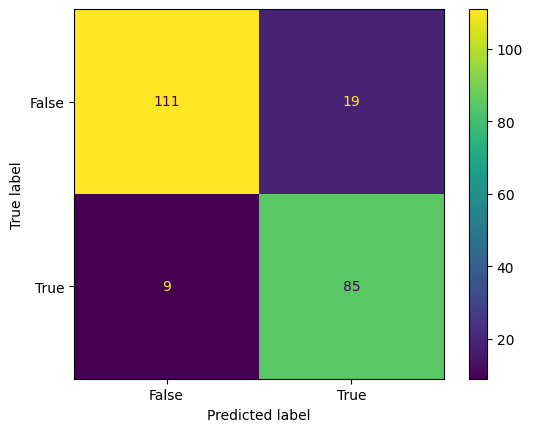

In [203]:
Predicted_RF = RF_clf.predict(noisy_reshaped_validation_0)
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):int(len(PurchaseRate))]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_actual, Predicted_RF)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

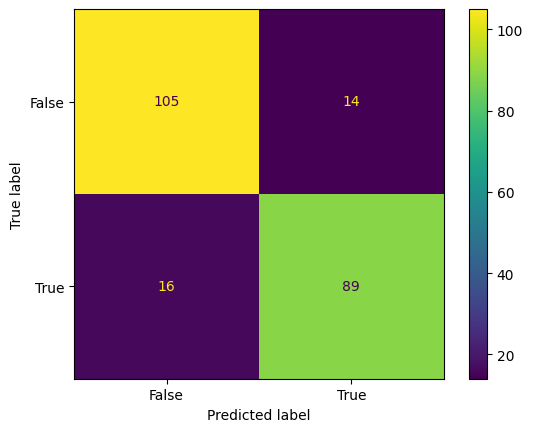

In [204]:
Predicted_RF = RF_clf.predict(noisy_reshaped_test_0)
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_actual, Predicted_RF)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

In [205]:
score_PurchaseRate_test_actual = RF_clf.score(noisy_reshaped_test_0,PurchaseRate_test_actual)
print('Our test set accuracy is: '+str(score_PurchaseRate_test_actual*100))

Our test set accuracy is: 86.60714285714286


# XGBoost

**29**. Gradient Boosting is an ensemble machine learning method that combines multiple weak learners to create a strong model. The idea behind this method is to sequentially build multiple weak models, and each of them will correct the errors of its predecessor. A Decision Tree is a model that makes predictions by splitting the data based on their feature values. On the other hand, Gradient Boosted Trees is an ensemble learning method that combines the predictions of multiple decision trees and each tree corrects the errors of the previous ones. A Decision Tree aims to maximize information gain but Gradient Boosted Trees use a gradient descent optimization approach and each tree minimizes the gradient of a loss function with respect to the predictions. Gradient Boosted Trees often outperform Decision Trees because they can capture complex patterns way better than Decision Trees. [14]



**30**. XGBoost builds trees sequentially in an additive manner. In each iteration, a new tree is added to the ensemble to correct the errors of the previous ones. At each of these iterations, a new tree structure is determined by optimizing an objective function. For classification tasks, we can use Logistic or Softmax loss functions. [15]



**31**. Here, we used zero and one instead of Low and High for our target parameter.

In [206]:
PurchaseRate_train_binary = []
for i in range(len(PurchaseRate_train)):
  if PurchaseRate_train[i] == 'High':
      PurchaseRate_train_binary.append(1)
  else:
      PurchaseRate_train_binary.append(0)

We used max_depth, n_estimators and learning_rate as our hyperparameters.

In [207]:
parameters = {'max_depth': range (1, 15, 1), 'n_estimators': range(1, 200, 50), 'learning_rate': [0.1, 0.01, 0.05]}
XGBoost_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
grid_search = GridSearchCV(estimator=XGBoost_model, param_grid=parameters)
grid_search.fit(np.array(reshaped_train_0), np.array(PurchaseRate_train_binary))
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=51, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

From GridSearchCV we can have below model.

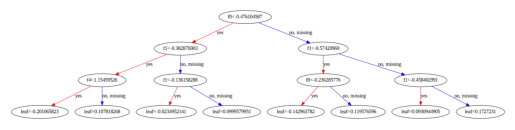

In [208]:
XGBoost_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, max_depth=3, n_estimators=151, random_state=42)
XGBoost_model.fit(np.array(reshaped_train_0), np.array(PurchaseRate_train_binary))
plot_tree(XGBoost_model)
plt.show()

Confusion Matrix of our model for the validation set.

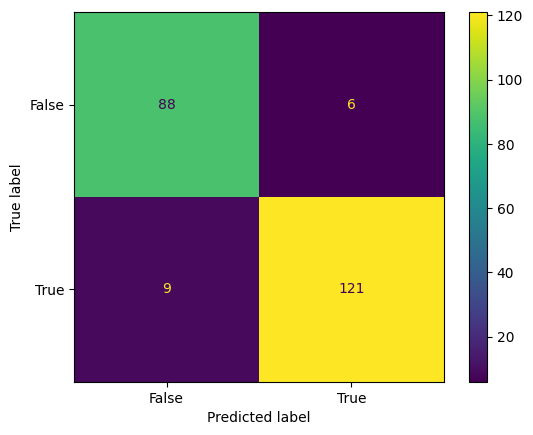

In [209]:
Predicted_XGBoost_model = XGBoost_model.predict(np.array(reshaped_validation_0))
PurchaseRate_validation_actual = PurchaseRate[int(len(PurchaseRate)*0.9):len(PurchaseRate)]
PurchaseRate_validation_binary = []
for i in range(len(PurchaseRate_validation_actual)):
  if PurchaseRate_validation_actual[i] == 'High':
      PurchaseRate_validation_binary.append(1)
  else:
      PurchaseRate_validation_binary.append(0)
confusion_matrix = metrics.confusion_matrix(PurchaseRate_validation_binary, Predicted_XGBoost_model)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Confusion Matrix of our model for the test set.

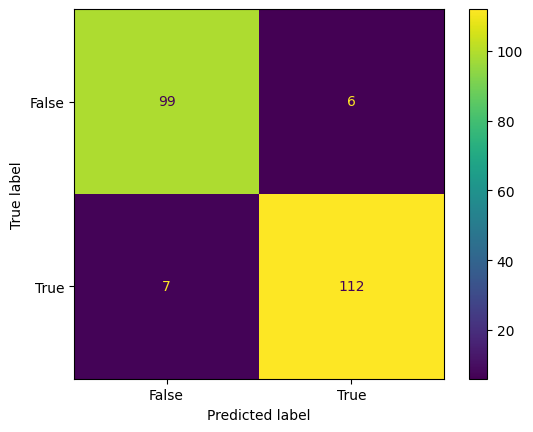

In [210]:
Predicted_XGBoost_model = XGBoost_model.predict(np.array(reshaped_test_0))
PurchaseRate_test_actual = PurchaseRate[train_last_index:int(len(PurchaseRate)*0.9)]
PurchaseRate_test_binary = []
for i in range(len(PurchaseRate_test_actual)):
  if PurchaseRate_test_actual[i] == 'High':
      PurchaseRate_test_binary.append(1)
  else:
      PurchaseRate_test_binary.append(0)
confusion_matrix = metrics.confusion_matrix(PurchaseRate_test_binary, Predicted_XGBoost_model)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

Now we can see our test set accuracy.

In [211]:
acc_xg = accuracy_score(PurchaseRate_test_binary, Predicted_XGBoost_model)
print('Our test set accuracy is: '+str(acc_xg*100))

Our test set accuracy is: 94.19642857142857


# Reference

1. ["Exploring Correlation in Python"](https://www.geeksforgeeks.org/exploring-correlation-in-python/). GeeksforGeeks

2. ["How to Deal with Missing Data"](https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/). CORP-MIDS1 (MDS).

3. ["Winsorized Mean: Formula, Examples and Meaning"](https://www.geeksforgeeks.org/winsorization/). Investopedia.

4. Bhandari, Aniruddha. ["Feature Engineering: Scaling, Normalization, and Standardization"](https://www.investopedia.com/terms/w/winsorized_mean.asp). Analytics Vidhya.

5. Braham. ["Data pre-processing: A step-by-step guide"](https://medium.com/analytics-vidhya/data-pre-processing-a-step-by-step-guide-eeb1c26301bd). Analytics Vidhya.

6. ["All About Train Test Split"](https://www.shiksha.com/online-courses/articles/train-test-split/).

7. Alexander S. Gillis. ["validation set"](https://www.techtarget.com/whatis/definition/validation-set).

8. ["Cross Validation in Machine Learning"](https://www.geeksforgeeks.org/cross-validation-machine-learning/). GeeksforGeeks.

9. ["Evaluation metrics & Model Selection in Linear Regression"](https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be). Towards Data Science.

10. ["ML | Underfitting and Overfitting"](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/). GeeksforGeeks.

11. ["A Beginner’s Guide to Random Forest Hyperparameter Tuning"](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/). Analytics Vidhya.

12. ["Why Random Forests Outperform Decision Trees: A Powerful Tool for Complex Data Analysis"](https://medium.com/@brijesh_soni/why-random-forests-outperform-decision-trees-a-powerful-tool-for-complex-data-analysis-47f96d9062e7). Medium.

13. ["The Algorithmic Foundations
of Differential Privacy"](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf). upenn.edu.

14. ["Decision Tree vs Random Forest vs Gradient Boosting Machines: Explained Simply"](https://www.datasciencecentral.com/decision-tree-vs-random-forest-vs-boosted-trees-explained/). Data Science Central.

15. ["What is XGBoost?"](https://www.nvidia.com/en-us/glossary/data-science/xgboost/). Nvidia.
